# Exploratory Data Analysis

## NYC Taxi Trip Duration

### Problem Statement: What is the duration of each trip at the point it starts 

In [2]:
import pandas as pd             #pandas for using dataframe and reading csv file(s)
import numpy as np              #numpy for vector operations and basic maths
import matplotlib.pyplot as plt #for plotting
%matplotlib inline              
import seaborn as sns           #for making plots
from haversine import haversine #for working with latitudinal and longitudinal data points
import math                     #for basic math operations
import warnings
from pandas.plotting import parallel_coordinates #for multivariate plots
warnings.filterwarnings('ignore') #ignore deprecation warnings

In [3]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
#first 20 instances using "head()" function
data.head(20)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0   id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1   id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2   id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3   id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4   id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   
5   id1918069          2  2016-02-14 18:31:42  2016-02-14 18:55:57   
6   id2429028          1  2016-04-20 20:30:14  2016-04-20 20:36:51   
7   id1663798          2  2016-06-19 16:48:14  2016-06-19 17:06:35   
8   id2436943          2  2016-03-28 19:17:03  2016-03-28 19:48:29   
9   id2933909          1  2016-04-10 22:01:41  2016-04-10 22:25:30   
10  id2750279          1  2016-01-17 19:40:26  2016-01-17 19:49:13   
11  id1338820          2  2016-04-22 23:33:30  2016-04-22 23:48:41   
12  id0670329          2  2016-01-13 20:25:29  2016-01-13 20:30:40   
13  id3131886          2  2016-06-26 13:39:30  2016-06-26 13:57:20   
14  id1054271          2  2016-03-17 20:35:44  2016-03-17 20:46:45   
15  id2930166          2  2016-02-21 01:56:14  2016-02-22 01:52:18   
16  id3867951          2  2016-04-13 22:27:11  2016-04-13 22:42:02   
17  id1520195          2  2016-02-29 08:48:00  2016-02-29 09:13:47   
18  id0424659          2  2016-02-22 22:36:38  2016-02-22 22:48:35   
19  id3128158          1  2016-04-19 21:52:54  2016-04-19 22:15:49   

    passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                 1        -73.953918        40.778873         -73.963875   
1                 2        -73.988312        40.731743         -73.994751   
2                 2        -73.997314        40.721458         -73.948029   
3                 6        -73.961670        40.759720         -73.956779   
4                 1        -74.017120        40.708469         -73.988182   
5                 2        -73.993614        40.751884         -73.995422   
6                 1        -73.965080        40.758915         -73.976807   
7                 1        -73.963890        40.765434         -73.872429   
8                 2        -73.872887        40.774281         -73.979019   
9                 1        -73.987823        40.740982         -73.999153   
10                1        -73.997116        40.722099         -74.006897   
11                1        -74.003792        40.741829         -73.993340   
12                1        -74.004822        40.728588         -73.997025   
13                1        -73.988800        40.752747         -73.995949   
14                1        -73.994789        40.744511         -73.965744   
15                1        -74.002876        40.734131         -73.955399   
16                1        -73.979599        40.760658         -73.978386   
17                1        -73.982536        40.745682         -74.011017   
18                3        -73.983482        40.755402         -73.946228   
19                1        -73.949425        40.713921         -73.972275   

    dropoff_latitude store_and_fwd_flag  trip_duration  
0          40.771164                  N            400  
1          40.694931                  N           1100  
2          40.774918                  N           1635  
3          40.780628                  N           1141  
4          40.740631                  N            848  
5          40.723862                  N           1455  
6          40.764107                  N            397  
7          40.774200                  N           1101  
8          40.761879                  N           1886  
9          40.686451                  N           1429  
10         40.708321                  N            527  
11         40.721882                  N            911  
12         40.727123                  N            311  
13         40.767254                  N           1070  
14         40.754070                  N            661  
15        

In [5]:
#last 20 instances using "tail()" function
data.tail(20)

id  vendor_id      pickup_datetime     dropoff_datetime  \
729302  id0927780          2  2016-01-08 16:50:53  2016-01-08 16:59:43   
729303  id3995685          2  2016-06-05 09:31:03  2016-06-05 09:48:24   
729304  id0280819          1  2016-03-30 16:17:03  2016-03-30 16:24:41   
729305  id3181346          2  2016-05-02 08:22:25  2016-05-02 08:32:19   
729306  id0893194          2  2016-03-06 14:54:03  2016-03-06 15:49:09   
729307  id1222178          2  2016-01-16 13:30:58  2016-01-16 13:41:40   
729308  id3477255          2  2016-01-20 08:22:38  2016-01-20 08:47:35   
729309  id2740069          1  2016-04-30 21:53:06  2016-04-30 22:03:42   
729310  id1055162          2  2016-04-16 16:47:20  2016-04-16 16:49:10   
729311  id3035110          1  2016-05-28 15:33:55  2016-05-28 15:41:19   
729312  id3683137          2  2016-01-01 00:47:30  2016-01-01 01:12:56   
729313  id3993907          1  2016-02-05 11:24:34  2016-02-05 11:46:39   
729314  id3226129          2  2016-03-21 03:43:03  2016-03-21 04:05:21   
729315  id3234032          1  2016-06-28 06:41:53  2016-06-28 06:43:43   
729316  id2031090          2  2016-01-25 22:31:56  2016-01-25 22:39:25   
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
729302                5        -73.999237        40.733917         -73.983917   
729303                2        -73.992897        40.746368         -73.952606   
729304                1        -73.976631        40.751862         -73.987221   
729305                1        -74.003395        40.726891         -73.987099   
729306                6        -73.983070        40.757626         -73.861641   
729307                3        -73.987732        40.759621         -73.993500   
729308                1        -73.977859        40.749538         -73.977859   
729309                1        -73.991104        40.723789         -74.004623   
729310                1        -73.957939        40.801128         -73.966591   
729311                1        -73.966988        40.772610         -73.973984   
729312                1        -73.984779        40.779781         -73.998718   
729313                1        -73.994034        40.751015         -74.003738   
729314                2        -73.987740        40.748222         -73.949585   
729315                1        -73.984116        40.725372         -73.982544   
729316                1        -73.974487        40.783138         -73.952629   
729317                2        -73.965919        40.789780         -73.952637   
729318                1        -73.996666        40.737434         -74.001320   
729319                1        -73.997849        40.761696         -74.001488   
729320                1        -74.006706        40.708244         -74.013550   
729321                4        -74.003342        40.743839         -73.945847   

        dropoff_latitude store_and_fwd_flag  trip_duration  
729302         40.745968                  N            530  
729303         40.725361                  N           1041  
729304         40.744850                  N            458  
729305         40.733337                  N            594  
729306         40.768276                  N           3306  
729307         40.749802                  N            642  
729308         40.749538                  N           1497  
729309         40.733921                  N            636  
729310         40.803429                  N            110  
729311         40.763077                  N            444  
729312         40.739777                  N           1526  
729313         40.722240  

In [6]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(729322, 11)

In [7]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
#Checking for NaN values present in data
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
#Checking for Null values present in data
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Variable Identification and Typecasting

In [10]:
# A closer look at the data types present in the data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

There are a lot of variables visible at once, so let's narrow this down by looking **at one datatype at once**. We will start with **int64** data type.


### Integer Data Type

In [11]:
#Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

Summary:

*    **vendor_id** is a unique, nominal code indicating the provider/business associated with the trip record. Note that there are only ***2 different vendors/businesses providing the taxi trips in our dataset***. Therefore, it needs to be **converted to a category**.

*    **passenger_count** represents the number of passengers in the vehicle (driver entered value). **However, it does not take on continuous values and we shall consider it as a categorical variable.**.

*    **trip_duration** is duration of the trip in seconds and we are **okay with it as Integer**.

In [12]:
#Converting vendor_id to category datatype
data['vendor_id'] = data['vendor_id'].astype('category')
data.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag      object
trip_duration            int64
dtype: object

In [13]:
#Converting passenger_count to category datatype
data['passenger_count'] = data['passenger_count'].astype('category')
data.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count       category
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag      object
trip_duration            int64
dtype: object

### Object Data Type

In [14]:
#Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

*    **Variables like 'id', 'pickup_datetime', 'dropoff_datetime', and 'store_and_fwd_flag' are of type object**. This means that **Pandas was not able to recognise the datatype** of these four variables.

In [15]:
#Converting the object data type variables to their respective datatype
data['id'] = data['id'].astype('category')
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

*    As can be seen above, we have converted 'id' and 'store_and_fwd_flag' to **category**. Due to the 'id' variable's format, we shall have to modify all of its values by removing the redundant 'id' part present in all values. We will also keep the 'id' variable as 'category', **since 'id' represents a unique identifier for each trip and most probably won't be used for analysis**. We change both 'pickup_datetime' and 'dropoff_datetime' to **datetime datatypes**. We will further investigate the datatime datatypes and extract more information from them.

In [16]:
#Modifying values of the 'id' variable by removing the redundant 'id' part present in all values
def modify_id(x):
    return x[2:]
data['id'] = data['id'].apply(modify_id)
data.head(10)

id vendor_id     pickup_datetime    dropoff_datetime passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01               1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57               2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48               2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32               6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31               1   
5  1918069         2 2016-02-14 18:31:42 2016-02-14 18:55:57               2   
6  2429028         1 2016-04-20 20:30:14 2016-04-20 20:36:51               1   
7  1663798         2 2016-06-19 16:48:14 2016-06-19 17:06:35               1   
8  2436943         2 2016-03-28 19:17:03 2016-03-28 19:48:29               2   
9  2933909         1 2016-04-10 22:01:41 2016-04-10 22:25:30               1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   
5        -73.993614        40.751884         -73.995422         40.723862   
6        -73.965080        40.758915         -73.976807         40.764107   
7        -73.963890        40.765434         -73.872429         40.774200   
8        -73.872887        40.774281         -73.979019         40.761879   
9        -73.987823        40.740982         -73.999153         40.686451   

  store_and_fwd_flag  trip_duration  
0                  N            400  
1                  N           1100  
2                  N           1635  
3                  N           1141  
4                  N            848  
5                  N           1455  
6                  N            397  
7                  N           1101  
8                  N           1886  
9                  N           1429

In [17]:
data.tail(10)

id vendor_id     pickup_datetime    dropoff_datetime  \
729312  3683137         2 2016-01-01 00:47:30 2016-01-01 01:12:56   
729313  3993907         1 2016-02-05 11:24:34 2016-02-05 11:46:39   
729314  3226129         2 2016-03-21 03:43:03 2016-03-21 04:05:21   
729315  3234032         1 2016-06-28 06:41:53 2016-06-28 06:43:43   
729316  2031090         2 2016-01-25 22:31:56 2016-01-25 22:39:25   
729317  3905982         2 2016-05-21 13:29:38 2016-05-21 13:34:34   
729318  0102861         1 2016-02-22 00:43:11 2016-02-22 00:48:26   
729319  0439699         1 2016-04-15 18:56:48 2016-04-15 19:08:01   
729320  2078912         1 2016-06-19 09:50:47 2016-06-19 09:58:14   
729321  1053441         2 2016-01-01 17:24:16 2016-01-01 17:44:40   

       passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
729312               1        -73.984779        40.779781         -73.998718   
729313               1        -73.994034        40.751015         -74.003738   
729314               2        -73.987740        40.748222         -73.949585   
729315               1        -73.984116        40.725372         -73.982544   
729316               1        -73.974487        40.783138         -73.952629   
729317               2        -73.965919        40.789780         -73.952637   
729318               1        -73.996666        40.737434         -74.001320   
729319               1        -73.997849        40.761696         -74.001488   
729320               1        -74.006706        40.708244         -74.013550   
729321               4        -74.003342        40.743839         -73.945847   

        dropoff_latitude store_and_fwd_flag  trip_duration  
729312         40.739777                  N           1526  
729313         40.722240                  N           1325  
729314         40.680737                  N           1338  
729315         40.731377                  N            110  
729316         40.772270                  N            449  
729317         40.789181                  N            296  
729318         40.731911                  N            315  
729319         40.741207                  N            673  
729320         40.713814                  N            447  
729321         40.712841                  N           1224

In [18]:
#Checking
data['id'] = data['id'].astype('category')
data.dtypes

id                          category
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

### Float Data Type

In [19]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

*    ***These look alright as is and should remain as float datatype***

In [20]:
#Next, for convenience, we shall add a new column for trip_duration_minutes
data['trip_duration_minutes'] = data['trip_duration'].apply(lambda x: x/60)

In [21]:
#We shall also make a feature for distance of the trip in kilometers (km)
def calc_distance(data):
    pickup = (data['pickup_latitude'], data['pickup_longitude'])
    drop = (data['dropoff_latitude'], data['dropoff_longitude'])
    return haversine(pickup, drop)
data['distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [22]:
#And lastly, we shall make a feature for the average speed of the trip in km/hr
data['speed'] = (data.distance/(data.trip_duration/3600))

In [23]:
data.head()

id vendor_id     pickup_datetime    dropoff_datetime passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01               1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57               2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48               2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32               6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31               1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  trip_duration  trip_duration_minutes  distance  \
0                  N            400               6.666667  1.199074   
1                  N           1100              18.333333  4.129117   
2                  N           1635              27.250000  7.250763   
3                  N           1141              19.016667  2.361101   
4                  N            848              14.133333  4.328540   

       speed  
0  10.791668  
1  13.513473  
2  15.964983  
3   7.449573  
4  18.375877

### datetime Data Type

In [24]:
#Obtain day names for each value
data.pickup_datetime.apply(lambda x: x.day_name())

0            Monday
1            Friday
2            Sunday
3           Tuesday
4         Wednesday
            ...    
729317     Saturday
729318       Monday
729319       Friday
729320       Sunday
729321       Friday
Name: pickup_datetime, Length: 729322, dtype: object

In [25]:
#Obtain month names for each value
data.pickup_datetime.apply(lambda x: x.month_name())

0         February
1            March
2         February
3          January
4         February
            ...   
729317         May
729318    February
729319       April
729320        June
729321     January
Name: pickup_datetime, Length: 729322, dtype: object

*    ***Although we already did convert both variables to datetime datatypes, we dont have to specify a format by using directives as it is already formatted correctly and we shall be using the 24 hour clock***

In [26]:
data.head()

id vendor_id     pickup_datetime    dropoff_datetime passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01               1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57               2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48               2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32               6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31               1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  trip_duration  trip_duration_minutes  distance  \
0                  N            400               6.666667  1.199074   
1                  N           1100              18.333333  4.129117   
2                  N           1635              27.250000  7.250763   
3                  N           1141              19.016667  2.361101   
4                  N            848              14.133333  4.328540   

       speed  
0  10.791668  
1  13.513473  
2  15.964983  
3   7.449573  
4  18.375877

*    ***We shall now extract important time-based features for better EDA experience***

In [27]:
# create time based features for pickup_datetime 
data['pickup_datetime_moy'] = data.pickup_datetime.dt.month
data['pickup_datetime_hour'] = data.pickup_datetime.dt.hour

In [28]:
# create more features for pickup_datetime 
data['pickup_datetime_woy'] = data.pickup_datetime.dt.weekofyear
data['pickup_datetime_dow'] = data.pickup_datetime.dt.dayofweek
data['pickup_datetime_doy'] = data.pickup_datetime.dt.dayofyear

In [29]:
# create time based features for dropoff_datetime 
data['dropoff_datetime_moy'] = data.dropoff_datetime.dt.month
data['dropoff_datetime_hour'] = data.dropoff_datetime.dt.hour
data['dropoff_datetime_woy'] = data.dropoff_datetime.dt.weekofyear
data['dropoff_datetime_dow'] = data.dropoff_datetime.dt.dayofweek
data['dropoff_datetime_doy'] = data.dropoff_datetime.dt.dayofyear

In [30]:
data.head()

id vendor_id     pickup_datetime    dropoff_datetime passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01               1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57               2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48               2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32               6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31               1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  ...  pickup_datetime_moy  pickup_datetime_hour  \
0                  N  ...                    2                    16   
1                  N  ...                    3                    23   
2                  N  ...                    2                    17   
3                  N  ...                    1                     9   
4                  N  ...                    2                     6   

   pickup_datetime_woy  pickup_datetime_dow  pickup_datetime_doy  \
0                    9                    0                   60   
1                   10                    4                   71   
2                    7                    6                   52   
3                    1                    1                    5   
4                    7                    2                   48   

   dropoff_datetime_moy  dropoff_datetime_hour  dropoff_datetime_woy  \
0                     2                     16                     9   
1                     3                     23                    10   
2                     2                     18                     7   
3                     1                     10                     1   
4                     2                      6                     7   

   dropoff_datetime_dow  dropoff_datetime_doy  
0                     0                    60  
1                     4                    71  
2                     6                    52  
3                     1                     5  
4                     2                    48  

[5 rows x 24 columns]

In [31]:
data.tail()

id vendor_id     pickup_datetime    dropoff_datetime  \
729317  3905982         2 2016-05-21 13:29:38 2016-05-21 13:34:34   
729318  0102861         1 2016-02-22 00:43:11 2016-02-22 00:48:26   
729319  0439699         1 2016-04-15 18:56:48 2016-04-15 19:08:01   
729320  2078912         1 2016-06-19 09:50:47 2016-06-19 09:58:14   
729321  1053441         2 2016-01-01 17:24:16 2016-01-01 17:44:40   

       passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
729317               2        -73.965919        40.789780         -73.952637   
729318               1        -73.996666        40.737434         -74.001320   
729319               1        -73.997849        40.761696         -74.001488   
729320               1        -74.006706        40.708244         -74.013550   
729321               4        -74.003342        40.743839         -73.945847   

        dropoff_latitude store_and_fwd_flag  ...  pickup_datetime_moy  \
729317         40.789181                  N  ...                    5   
729318         40.731911                  N  ...                    2   
729319         40.741207                  N  ...                    4   
729320         40.713814                  N  ...                    6   
729321         40.712841                  N  ...                    1   

        pickup_datetime_hour  pickup_datetime_woy  pickup_datetime_dow  \
729317                    13                   20                    5   
729318                     0                    8                    0   
729319                    18                   15                    4   
729320                     9                   24                    6   
729321                    17                   53                    4   

        pickup_datetime_doy  dropoff_datetime_moy  dropoff_datetime_hour  \
729317                  142                     5                     13   
729318                   53                     2                      0   
729319                  106                     4                     19   
729320                  171                     6                      9   
729321                    1                     1                     17   

        dropoff_datetime_woy  dropoff_datetime_dow  dropoff_datetime_doy  
729317                    20                     5                   142  
729318                     8                     0                    53  
729319                    15                     4                   106  
729320                    24                     6                   171  
729321                    53                     4                     1  

[5 rows x 24 columns]

In [32]:
data.dtypes

id                             category
vendor_id                      category
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
passenger_count                category
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
store_and_fwd_flag             category
trip_duration                     int64
trip_duration_minutes           float64
distance                        float64
speed                           float64
pickup_datetime_moy               int64
pickup_datetime_hour              int64
pickup_datetime_woy               int64
pickup_datetime_dow               int64
pickup_datetime_doy               int64
dropoff_datetime_moy              int64
dropoff_datetime_hour             int64
dropoff_datetime_woy              int64
dropoff_datetime_dow              int64
dropoff_datetime_doy              int64
dtype: object

In [33]:
data.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count     729322.000000    729322.000000      729322.000000     729322.000000   
mean         -73.973513        40.750919         -73.973422         40.751775   
std            0.069754         0.033594           0.069588          0.036037   
min         -121.933342        34.712234        -121.933304         32.181141   
25%          -73.991859        40.737335         -73.991318         40.735931   
50%          -73.981758        40.754070         -73.979759         40.754509   
75%          -73.967361        40.768314         -73.963036         40.769741   
max          -65.897385        51.881084         -65.897385         43.921028   

       trip_duration  trip_duration_minutes       distance          speed  \
count   7.293220e+05          729322.000000  729322.000000  729322.000000   
mean    9.522291e+02              15.870486       3.441143      14.421468   
std     3.864626e+03              64.410437       4.353138      12.341044   
min     1.000000e+00               0.016667       0.000000       0.000000   
25%     3.970000e+02               6.616667       1.232697       9.124323   
50%     6.630000e+02              11.050000       2.095675      12.796846   
75%     1.075000e+03              17.916667       3.876486      17.843942   
max     1.939736e+06           32328.933333    1240.910391    5640.501776   

       pickup_datetime_moy  pickup_datetime_hour  pickup_datetime_woy  \
count        729322.000000         729322.000000        729322.000000   
mean              3.518410             13.611698            13.843884   
std               1.680661              6.402853             8.558386   
min               1.000000              0.000000             1.000000   
25%               2.000000              9.000000             7.000000   
50%               4.000000             14.000000            13.000000   
75%               5.000000             19.000000            20.000000   
max               6.000000             23.000000            53.000000   

       pickup_datetime_dow  pickup_datetime_doy  dropoff_datetime_moy  \
count        729322.000000        729322.000000         729322.000000   
mean              3.049081            91.882577              3.518764   
std               1.954470            51.555655              1.680815   
min               0.000000             1.000000              1.000000   
25%               1.000000            48.000000              2.000000   
50%               3.000000            92.000000              4.000000   
75%               5.000000           136.000000              5.000000   
max               6.000000           182.000000              7.000000   

       dropoff_datetime_hour  dropoff_datetime_woy  dropoff_datetime_dow  \
count           729322.00000         729322.000000         729322.000000   
mean                13.60616             13.842964              3.053015   
std                  6.48637              8.555423              1.956866   
min                  0.00000              1.000000              0.000000   
25%                  9.00000              7.000000              1.000000   
50%                 14.00000             13.000000              3.000000   
75%                 19.00000             20.000000              5.000000   
max                 23.00000             53.000000              6.000000   

       dropoff_datetime_doy  
count         729322.000000  
mean              91.893805  
std               51.556407  
min                1.000000  
25%               48.000000  
50%               92.000000  
75%              136.000000  
max              183.000000

*   Now we are done breaking down the pick_up datetime variable into granular forms, as seen above, which will **help us better analyze information extracted from the pickup time and trip duration.** We are also done with the Variable identification and typecasting process and will now start the Univariate Analysis portion of the EDA, followed by Bivariate Analysis, and, lastly, Multivariate Analysis.

## Univariate Analysis: Numerical Variables

In [34]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
trip_duration              int64
trip_duration_minutes    float64
distance                 float64
speed                    float64
pickup_datetime_moy        int64
pickup_datetime_hour       int64
pickup_datetime_woy        int64
pickup_datetime_dow        int64
pickup_datetime_doy        int64
dropoff_datetime_moy       int64
dropoff_datetime_hour      int64
dropoff_datetime_woy       int64
dropoff_datetime_dow       int64
dropoff_datetime_doy       int64
dtype: object

In [35]:
# segregating variables into groups
pickup_dropoff_location = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
trip_details = ['trip_duration','trip_duration_minutes', 'distance', 'speed']
pickup_dropoff_time = ['pickup_datetime_moy', 'dropoff_datetime_moy', 'pickup_datetime_hour', 'dropoff_datetime_hour', 'pickup_datetime_woy', 'dropoff_datetime_woy', 'pickup_datetime_dow', 'dropoff_datetime_dow', 'pickup_datetime_doy', 'dropoff_datetime_doy']

In [36]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    mode = data[i].mode()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    sns.scatterplot([mode], [0], color = 'green', label = "mode")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
                                                                                           

### pickup_dropoff_location

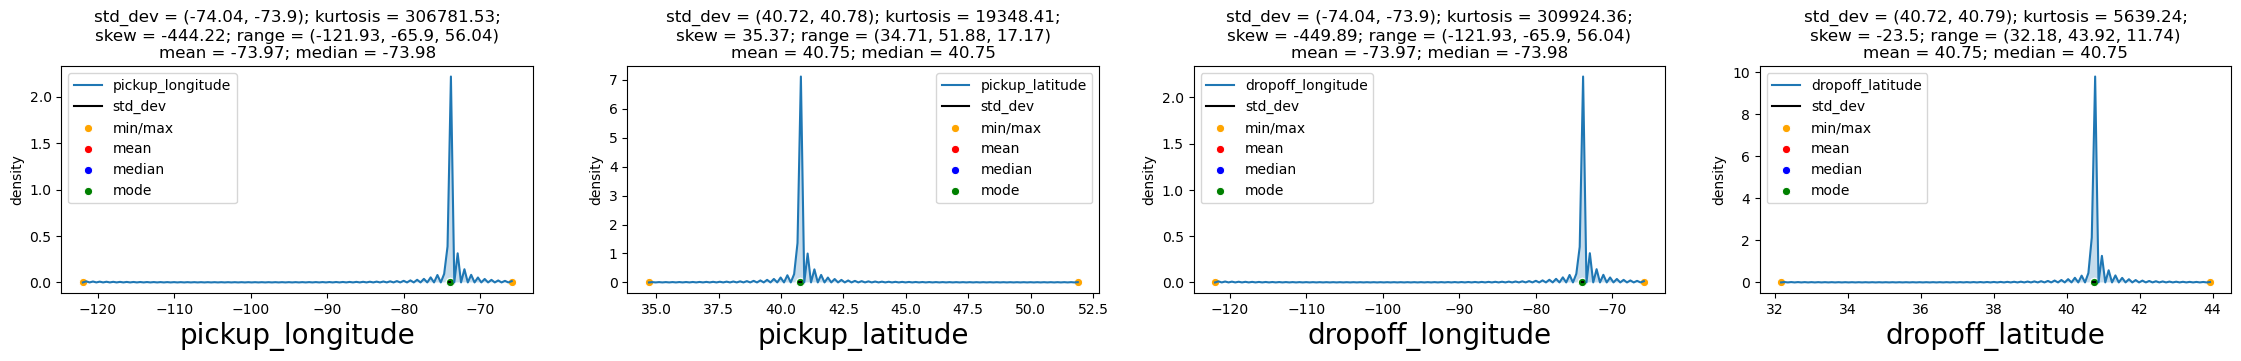

In [37]:
UVA_numeric(data,pickup_dropoff_location)

**Summary of pickup_dropoff_location:**

*    **pickup_longitude and dropoff_longitude**:
    *    Median = -73.98
    *    **Both are centered around -74 to -73**
    *    **-444.22 <= skewness <= -449.89**  : both are **significantly left or negatively skewed** 
    *    **306781 <= kurtosis <= 309925.36**; As seen by the values, the distributions are highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features.

*    **pickup_latitude and dropoff_latitude**:
    *    Median = 40.75
    *    **Both are centered around 40.5 to 41.5**
    *    **skewness**  : both have completely opposite skewness, with pickup_latitude having a right or positive skew and dropoff_latitude with a left or negative skew. This is because of very distant pickup and dropoff locations, which lead to extreme values for trip duration. Both are **significantly skewed too**.
    *    **19348.41 <= kurtosis <= 5639.24**; As seen by the values, the distributions are highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features.

**Things to Investigate Further down the road:**
*    Removal of the extreme values and Outliers, as can be seen in the skewness and kurtosis values 
*    For latitude values, **each degree of latitude is approximately 69 miles or 111 kilometers apart. Keeping this fact in mind, we are confident that many outliers exist in this category as the maximum pickup_latitude value is 51.88 and the maximum dropoff_latitude value is 43.92.** 
*   Therefore, a difference of about 8 latitudes between pickup and dropoff seems abnormal and, hence, we shall have to remove these kind of outliers.
*   Because we are investigating NYC taxi trips, **most of the trips are located in the 5 Boroughs of NYC: The Bronx (40.8448 N, 73.8648 W), Queens (40.7282 N, 73.7949 W), Staten Island (40.5795 N, 74.1502 W), Manhattan (40.7831 N, 73.9712 W), Brooklyn (40.6782 N, 73.9442 W). Therefore, we can remove outliers keeping these latitude and longitude values in mind.**
*   ***Keeping the above point in mind, we can move ahead to remove these Outliers in the pickup_dropoff_location group and visualize these plots again to gain a better understanding of the distributions.***

In [38]:
# copying pickup_dropoff_location
pdl_data = data[pickup_dropoff_location]

# filtering using loc
pdl_data = pdl_data.loc[(pdl_data.pickup_longitude > -74.2) & (pdl_data.pickup_longitude < -73.7)]
pdl_data = pdl_data.loc[(pdl_data.pickup_latitude > 40.5) & (pdl_data.pickup_latitude < 40.95)]
pdl_data = pdl_data.loc[(pdl_data.dropoff_longitude > -74.2) & (pdl_data.dropoff_longitude < -73.7)]
pdl_data = pdl_data.loc[(pdl_data.dropoff_latitude > 40.5) & (pdl_data.dropoff_latitude < 40.95)]

# checking how many points are removed
len(data), len(pdl_data)

(729322, 728754)

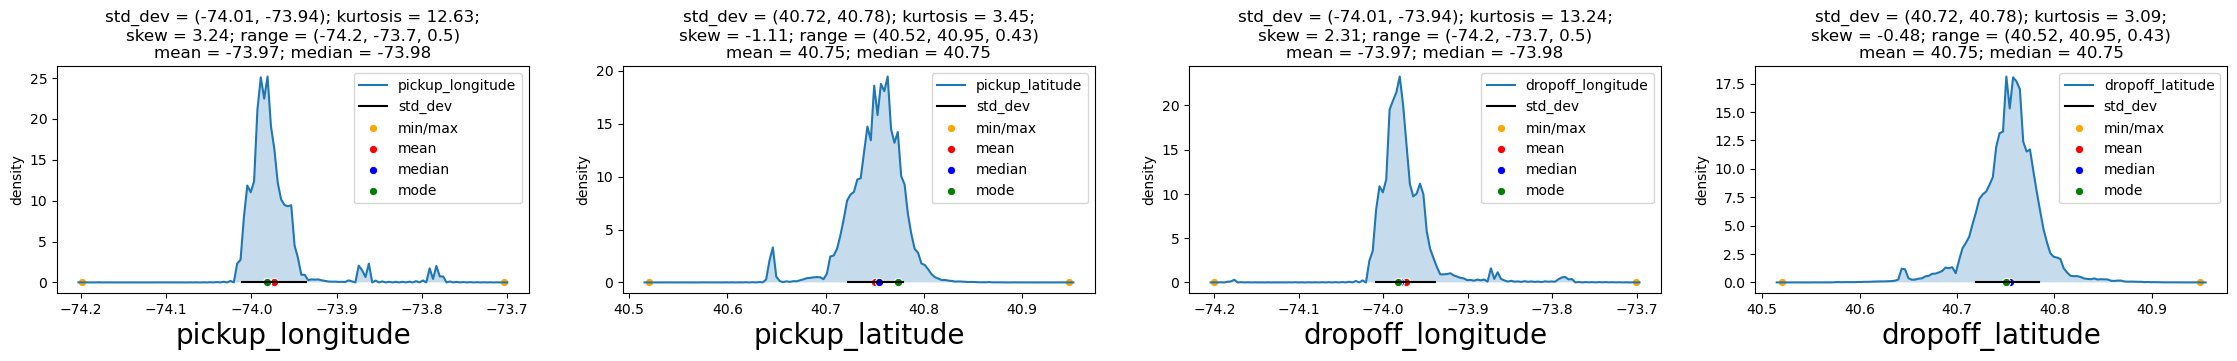

In [39]:
UVA_numeric(pdl_data,pickup_dropoff_location)

**Final Summary of pickup_dropoff_location:**

*    From the above KDE plots, we can conclude that the removal of outlier values from both latitude and longitudinal data did lower skewness and kurtosis by a big margin. Moreover, in the process we lost few amount of observations (729322-728194 = 1128), which would not hinder further EDA analysis, but provide a better picture.

*    Therefore, we can put the following limits on latitudinal and longitudinal data:
     *    Latitudinal data range should be between 40.6 to 40.95
     *    Longitude data range be between -74.2 to -73.70

**Things to Investigate Further in EDA:**
*    Removal of the extreme values and Outliers in the dataset by following the limits we have set
*    Trip durations relation with outlier values of all features associated with the pickup_dropoff_location group

### trip_details

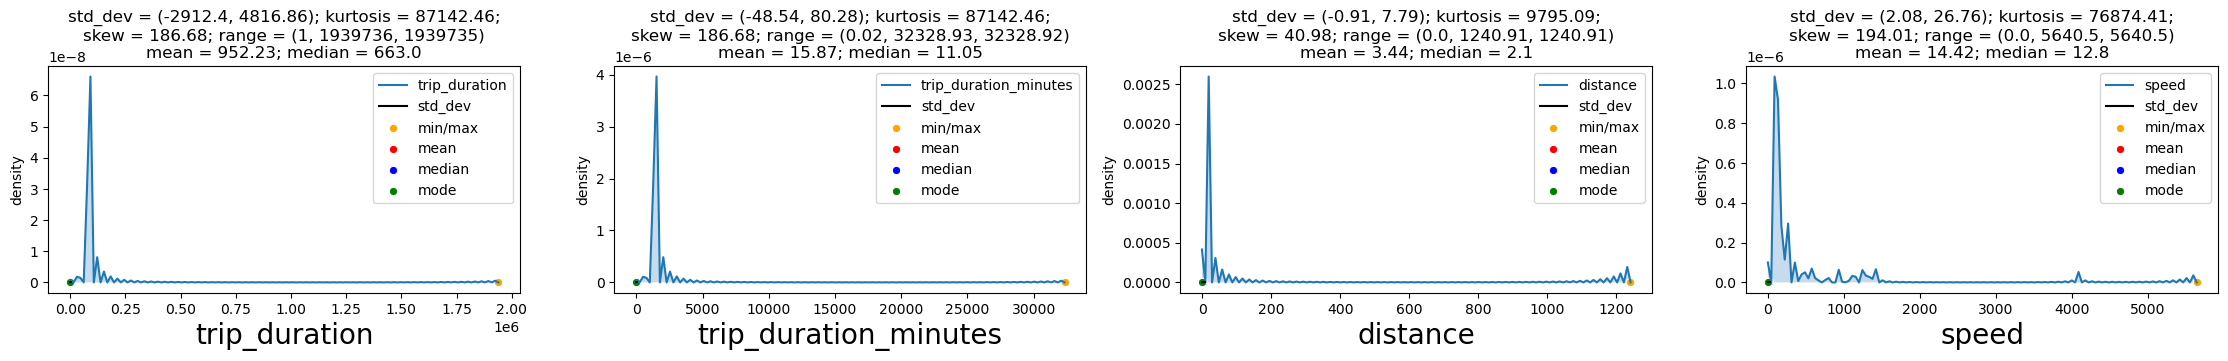

In [40]:
UVA_numeric(data,trip_details)

In [41]:
data.distance[data.distance == 0 ].count()

2901

**Summary of trip_details:**

*    **trip_duration_minutes**:
    *    trip_duration uses the seconds unit to denote the duration and, hence, for convenience we shall be analyzing trip_duration_minutes
    *    Median = 11.05 minutes
    *    skewness for both trip_duration and trip_duration_minutes are bound to be the same and are **significantly right or positively skewed** 
    *    kurtosis value too is bound to be the same for both and is 87142.46. As seen by the values, the distributions are highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features. For example, we see values greater than 5000 minutes or, in other words, trips that went on for more than 3 days.
    *    An important point to keep in mind is that **NYC is renowned for traffic and congestion, which would add a hefty amount to trip_duration even for short distances**. Hence, when considering dealing with outliers, we shall be more careful of considering this factor and be a bit more lenient in removing these outliers.
    *    Another key point to note is that there exist several trips that have durations of 0 seconds or 0 minutes 
    
    
*    **distance (Note: represented in km)**:
    *    Median = 2.1 km
    *    An interesting find is that the **minimum value associated with distance is 0 and there are 2901 observations with distance = 0.** This could denote the following: drop off location is same as the pickup location, customer could've cancelled the trip right after booking/confirming it or driver could've also cancelled the trip after confirming it, **connectivity or software issues with held-in vehicle memory (this can be analyzed further in the Bivariate Analysis section with the feature store_and_fwd_flag). This finding will also be analyzed further in relation to the trip duration features to extract more convincing information.**
    *    **skewness = 40.98**  : **significantly right or positively skewed**, just like both trip duration features as expected.
    *    **kurtosis = 9795.09**; The distribution is highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features. 
    *    According to internet sources, most NYC taxi cabs do not travel outside city limits; however, **some cabs do occasionally take riders to New Jersey and also have the right to refuse for doing so.** These rides from NYC to New Jersey involve riders negotiating prices with the cab drivers and it often ends up being very expensive, as the driver has to return to NYC without a fare and, hence, riders have to pay a two-way fare. 
    *    **The distance from NYC to New Jersey is about 74 miles or 119 kilometres, which suprisingly translates to about a difference of 1 latitude degree!** Therefore, it can be safe to conclude that trips greater than 120 kilometres can be considered as outliers. Moreover, it's illegal for taxi drivers to refuse a fare in any of NYC's five boroughs


*    **speed (Note: represented in km/hr)**:
    *    Median = 12.8 km/hr
    *    **skewness = 194.01**  : **significantly right or positively skewed**, just like both trip duration features as expected.
    *    **kurtosis = 76874.41**; The distribution is highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features. For example, we see speed values of much more than 200km/hr in the dataset and these values
    *    According to the NYC.gov website, **the speed limit in NYC (citywide) is 25 miles per hour (mph) or 40 km/hr, unless otherwise posted, and the speed limit on New York State highways (statewide) is 55 mph or 88.5 km/hr, unless otherwise posted.** However, the highest posted speed limit in New York is 65 mph or 105 km/hr, found only on limited-access freeways. Therefore, we can safely conclude that all speeds greater than 105 km/hr be treated as outliers. 

**Things to Investigate Further down the road:**
*    Removal of the extreme values and Outliers, as can be seen in the skewness and kurtosis values 
*   ***Keeping the above summary details in mind, we can move ahead to remove these Outliers in the trip_details group and visualize these plots again to gain a better understanding of the distributions.***

In [42]:
# copying trip_details
td_data = data[trip_details]

# filtering all trip_details variables using loc
td_data = td_data.loc[(td_data.trip_duration < 7200)]
td_data = td_data.loc[(td_data.trip_duration_minutes < 120)]
td_data = td_data.loc[(td_data.distance < 150)]
td_data = td_data.loc[(td_data.speed < 105)]

# checking how many points are removed
len(data), len(td_data)

(729322, 728150)

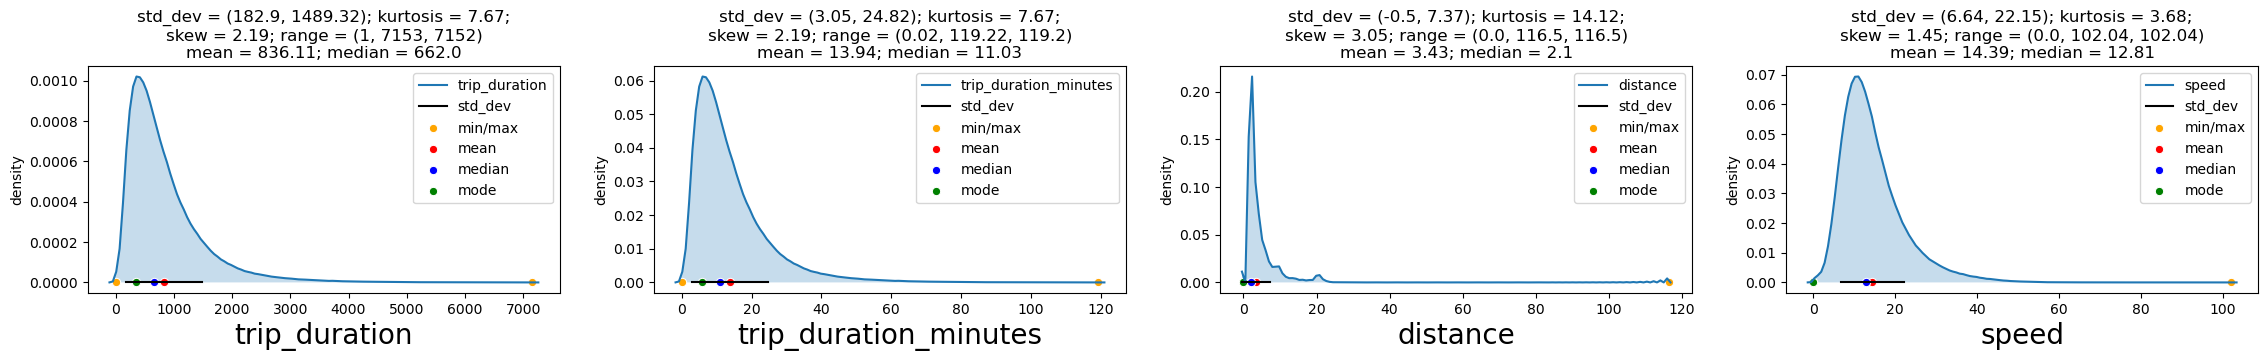

In [43]:
UVA_numeric(td_data,trip_details)

**Final Summary of trip_details:**

*    From the above KDE plots, we can conclude that the removal of certain outlier values, as discussed above, from trip_details group did lower skewness and kurtosis by a big margin. Moreover, in the process we lost few amount of observations (729322-728226 = 1096), which would not hinder further EDA analysis, but provide a better picture.

*    However, we should note from all these KDE plots above that **the distributions are still right or positively skewed as well as leptokurtic. The removal of outliers in the original trip_details data, with respect to restrictions set by the NYC government, did still result in few outliers in the new KDE plots**. Therefore, this signifies that we can **better our performance on the EDA process by being stricter with outlier removal, in terms of removing those observations of interstate travel (NYC to NJ), and still not lose key or essential insights that can be generated**. 

*    Therefore, we can put the following limits on trip_details features:
     *    **trip_duration_minutes data range can be reduced from 1 minute to 60 minutes and trip_duration data range can be reduced from 1 second (impractical but we'll use it) to 3600 seconds.**
     *    **distance data range could be reduced from 1 km to 40 km and speed data range can be reduced from 1 km/hr (impractical but we'll use it) to 55 km/hr.** 
     *    **These restrictions or removal of outliers in this method basically signifies that we shall be concentrating mainly on those trips within the 5 boroughs of NYC, as the data suggests, including some leeway for traffic.**

**Things to Investigate Further in EDA:**
*    Removal of the extreme values and Outliers in the dataset by following the limits we have set
*    Trip durations relation with outlier values of all features associated with the pickup_dropoff_location group

### pickup_dropoff_time

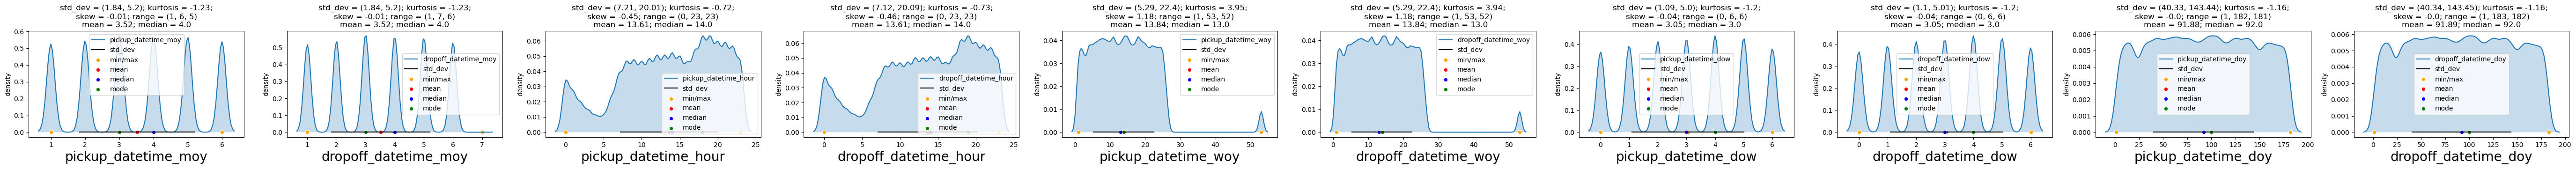

In [44]:
UVA_numeric(data,pickup_dropoff_time) 

**Summary of pickup_time:**

*    **pickup_datetime_moy and dropoff_datetime_moy**:
    *     Our dataset contains only data for the first 6 months of the year and from the distribution seen, most of the months share almost the same number of trips. **Months 1 and 2 or January and February respectively saw the least number of trips, as expected, because it is the coldest month in NYC. Spring Season or Months 3-5 (March-May) saw the highest number of trips reported, as expected.**
    
    
*    **pickup_datetime_hour and dropoff_datetime_hour**:
    *    The lowest number of taxi trips, overall, occur between hours 0-5 or 12am to 5am. After 5am, traffic keeps increasing till around 8am/9am, mostly owing to the fact that people are travelling to work/office or school, and then stays the same at that level until about 5pm/6pm. Then rush hour or peak traffic is observed from 6pm onwards until 10pm, as people are leaving from work/office to go home. This type of distribution is expectedly typical in most metropolitan cities too.
    

*    **pickup_datetime_woy and dropoff_datetime_woy**:
    *    An important fact to keep in mind is that there are approx. 52 weeks in a year. We observe a steady distribution across all the weeks, from week 1 to week 27 (up until July begins). Also, our data only includes data for the first 6 months (therefore, not including July). However, we see another peak at the 53rd week of the year, which seems like those values corresponding to week 53 are outliers. Remember, we said that there are approx. 52 weeks in a year, so how can we get a value of 53? Does this imply the beginning of a new year, 2017? It cannot since we only have vlaues from the year 2016. We shall investigate this abnormality in the data below!
    
    
*    **pickup_datetime_dow and dropoff_datetime_dow**:
    *    Again, we see a pretty consistent distribution of the number of trips across the different days of the week, with week 4 or Friday having the greatest amount of trips.
    
    
*    **pickup_datetime_doy and dropoff_datetime_doy**:
    *    Another important relation to notice is that day of year and week of year should follow similar distributions and, hence, validate each other. Here, the day of year distribution seems alright without any apparent abnormalities, unlike week of year. Therefore, this signifies that we will have to explore week of year more closely, as mentioned above. 

**Things to Investigate Further down the road:**
*    Week of year abnormality checking seen below

In [45]:
#Taking into consideration the points mentioned about week of year, we shall make a new column for only year and confirm that only the year 2016 is present
data['pickup_datetime_year'] = data.pickup_datetime.dt.year
data['pickup_datetime_year'].describe()

count    729322.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: pickup_datetime_year, dtype: float64

**Therefore, max value proves that only the year 2016 is present and we can go ahead to change the week of year values of 53 to 1. We also shall not be needing this column, so it's better we delete it now.**

In [46]:
#dropping column pickup_datetime_year
data.drop('pickup_datetime_year', axis=1, inplace=True)
data.head()

id vendor_id     pickup_datetime    dropoff_datetime passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01               1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57               2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48               2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32               6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31               1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  ...  pickup_datetime_moy  pickup_datetime_hour  \
0                  N  ...                    2                    16   
1                  N  ...                    3                    23   
2                  N  ...                    2                    17   
3                  N  ...                    1                     9   
4                  N  ...                    2                     6   

   pickup_datetime_woy  pickup_datetime_dow  pickup_datetime_doy  \
0                    9                    0                   60   
1                   10                    4                   71   
2                    7                    6                   52   
3                    1                    1                    5   
4                    7                    2                   48   

   dropoff_datetime_moy  dropoff_datetime_hour  dropoff_datetime_woy  \
0                     2                     16                     9   
1                     3                     23                    10   
2                     2                     18                     7   
3                     1                     10                     1   
4                     2                      6                     7   

   dropoff_datetime_dow  dropoff_datetime_doy  
0                     0                    60  
1                     4                    71  
2                     6                    52  
3                     1                     5  
4                     2                    48  

[5 rows x 24 columns]

In [47]:
data.dtypes

id                             category
vendor_id                      category
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
passenger_count                category
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
store_and_fwd_flag             category
trip_duration                     int64
trip_duration_minutes           float64
distance                        float64
speed                           float64
pickup_datetime_moy               int64
pickup_datetime_hour              int64
pickup_datetime_woy               int64
pickup_datetime_dow               int64
pickup_datetime_doy               int64
dropoff_datetime_moy              int64
dropoff_datetime_hour             int64
dropoff_datetime_woy              int64
dropoff_datetime_dow              int64
dropoff_datetime_doy              int64
dtype: object

In [48]:
#change the pickup_datetime_woy and dropoff_datetime_woy values of 53 to 1
data.loc[(data.pickup_datetime_woy == 53),'pickup_datetime_woy'] = 1
data.loc[(data.dropoff_datetime_woy == 53),'dropoff_datetime_woy'] = 1
data.head()

id vendor_id     pickup_datetime    dropoff_datetime passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01               1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57               2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48               2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32               6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31               1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  ...  pickup_datetime_moy  pickup_datetime_hour  \
0                  N  ...                    2                    16   
1                  N  ...                    3                    23   
2                  N  ...                    2                    17   
3                  N  ...                    1                     9   
4                  N  ...                    2                     6   

   pickup_datetime_woy  pickup_datetime_dow  pickup_datetime_doy  \
0                    9                    0                   60   
1                   10                    4                   71   
2                    7                    6                   52   
3                    1                    1                    5   
4                    7                    2                   48   

   dropoff_datetime_moy  dropoff_datetime_hour  dropoff_datetime_woy  \
0                     2                     16                     9   
1                     3                     23                    10   
2                     2                     18                     7   
3                     1                     10                     1   
4                     2                      6                     7   

   dropoff_datetime_dow  dropoff_datetime_doy  
0                     0                    60  
1                     4                    71  
2                     6                    52  
3                     1                     5  
4                     2                    48  

[5 rows x 24 columns]

In [49]:
#confirming that pickup_datetime_woy does not have values of 53 anymore
data[data.pickup_datetime_woy == 53]

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration, trip_duration_minutes, distance, speed, pickup_datetime_moy, pickup_datetime_hour, pickup_datetime_woy, pickup_datetime_dow, pickup_datetime_doy, dropoff_datetime_moy, dropoff_datetime_hour, dropoff_datetime_woy, dropoff_datetime_dow, dropoff_datetime_doy]
Index: []

[0 rows x 24 columns]

In [50]:
#confirming that dropoff_datetime_woy does not have values of 53 anymore
data[data.dropoff_datetime_woy == 53]

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration, trip_duration_minutes, distance, speed, pickup_datetime_moy, pickup_datetime_hour, pickup_datetime_woy, pickup_datetime_dow, pickup_datetime_doy, dropoff_datetime_moy, dropoff_datetime_hour, dropoff_datetime_woy, dropoff_datetime_dow, dropoff_datetime_doy]
Index: []

[0 rows x 24 columns]

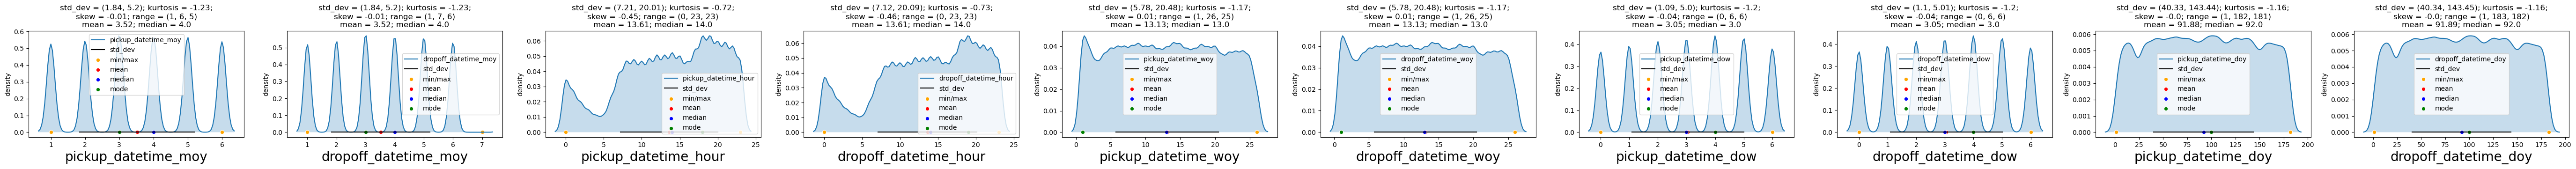

In [51]:
#Plotting the distributions again to see the effect of replacing incorrect values
UVA_numeric(data,pickup_dropoff_time) 

## Univariate Analysis : Categorical Variables

In [52]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                          category
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count             category
store_and_fwd_flag          category
dtype: object

**The useful variables here are passenger_count, vendor_id and store_and_fwd_flag. Since they are singular and belong to different groups, we will not group them and use them as is, unlike the approach we applied for Numerical Variables.**

In [53]:
# Custom function for easy visualisation of Categorical Variables
def UVA_variable(data, var):

  '''
  Univariate_Analysis_categorical
  takes a categorical variable and plots/prints all the value_counts and a barplot.
  '''
  # setting figure_size
  size = len(var)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### passenger_count

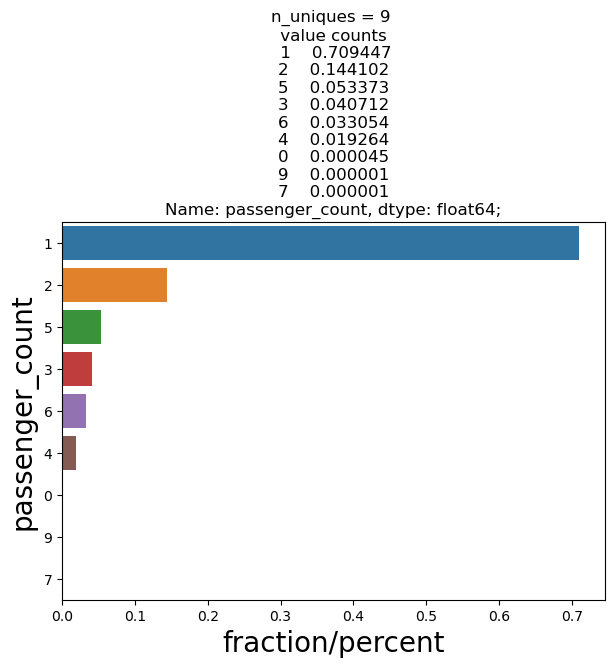

In [54]:
UVA_variable(data, ['passenger_count'])

**Summary of passenger_count:**

*    **passenger_count**:
    *    Median Number of Passengers in a Taxi = 1
    *    **Most taxis, roughly 85%, carry 1-2 passengers**
    *    **skewness must be positive**, as passenger_count is **significantly biased towards lesser number of passengers** and this seems logical too
    *    **kurtosis must be high too**; The distribution, thus, is leptokurtic. In essence, extreme values and Outliers are very likely to be present in passenger_count, as seen by values greater than 6. 


**Things to Investigate Further down the road:**
*    Removal of the extreme values and Outliers, as can be seen in the range of the distribution (0 minimum - 9 maximum). passenger_count values that are 0,7, and 9 can be dropped because their counts compared to the rest in the dataset is very trivial.
*    As per the NYC.gov website, the maximum amount of passengers allowed in a yellow taxicab by law is four in a four passenger taxicab or five passengers in a five passenger taxicab, except that an additional passenger must be accepted if such a passenger is under the age of seven and is held on the lap of an adult passenger seated in the rear. 
*   Therefore, we can assume that **6 passengers, at maximum, can ride in a NYC taxi i.e. 5 adults + 1 minor.**
*   ***Keeping the above point in mind, we can move ahead to remove these Outliers of passenger_count and visualize these plots again to gain a better understanding of the distribution of passenger_count. This will be seen in the section named Univariate Analyis: Outliers***

### vendor_id

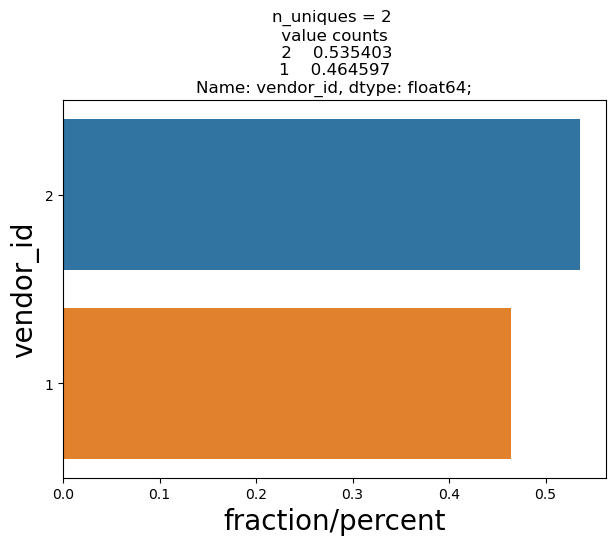

In [55]:
UVA_variable(data, ['vendor_id'])

**Summary**

* vendor_id:
  *  About 53.5% of vendors belong to vendor 2 and the rest to vendor 1.

**Things to investigate further down:**
* Relation between vendor_id with distance travelled, trip duration, variables in pickup_time group, and passenger counts for taxis of both vendors

### store_and_fwd_flag

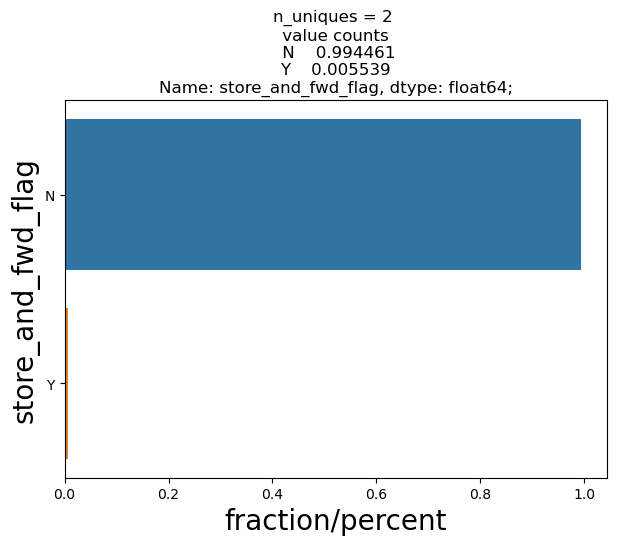

In [56]:
UVA_variable(data, ['store_and_fwd_flag'])

**Summary**

* store_and_fwd_flag:
  *  Almost a full majority of trip records were not held in-vehicle memory before sending to the vendor because the vehicle did not have a connection to the server.

**Things to investigate further down:**
* Relation between store_and_fwd_flag or flag type with distance travelled, trip duration, variables in pickup_time group, and passenger counts.

## Univariate: Missing Values

In [57]:
data.isna().sum()

id                       0
vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
store_and_fwd_flag       0
trip_duration            0
trip_duration_minutes    0
distance                 0
speed                    0
pickup_datetime_moy      0
pickup_datetime_hour     0
pickup_datetime_woy      0
pickup_datetime_dow      0
pickup_datetime_doy      0
dropoff_datetime_moy     0
dropoff_datetime_hour    0
dropoff_datetime_woy     0
dropoff_datetime_dow     0
dropoff_datetime_doy     0
dtype: int64

## Univariate Analysis: Outliers 

In [58]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it 

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables
  include_outlier : {bool} whether to include outliers or not, default = True
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,8), dpi = 200)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nOutlier (low/high) = {} \n'.format((outlier_low,outlier_high)))
                                                                                                   
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      quant25 = data2[i].quantile(0.25)
      quant75 = data2[i].quantile(0.75)
      IQR = quant75 - quant25
      med = data2[i].median()
      whis_low = med-(1.5*IQR)
      whis_high = med+(1.5*IQR)
      outlier_high = len(data2[i][data2[i]>whis_high])
      outlier_low = len(data2[i][data2[i]<whis_low])
    
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n'.format(round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2))
                                                                                                   ))

### passenger_count

True


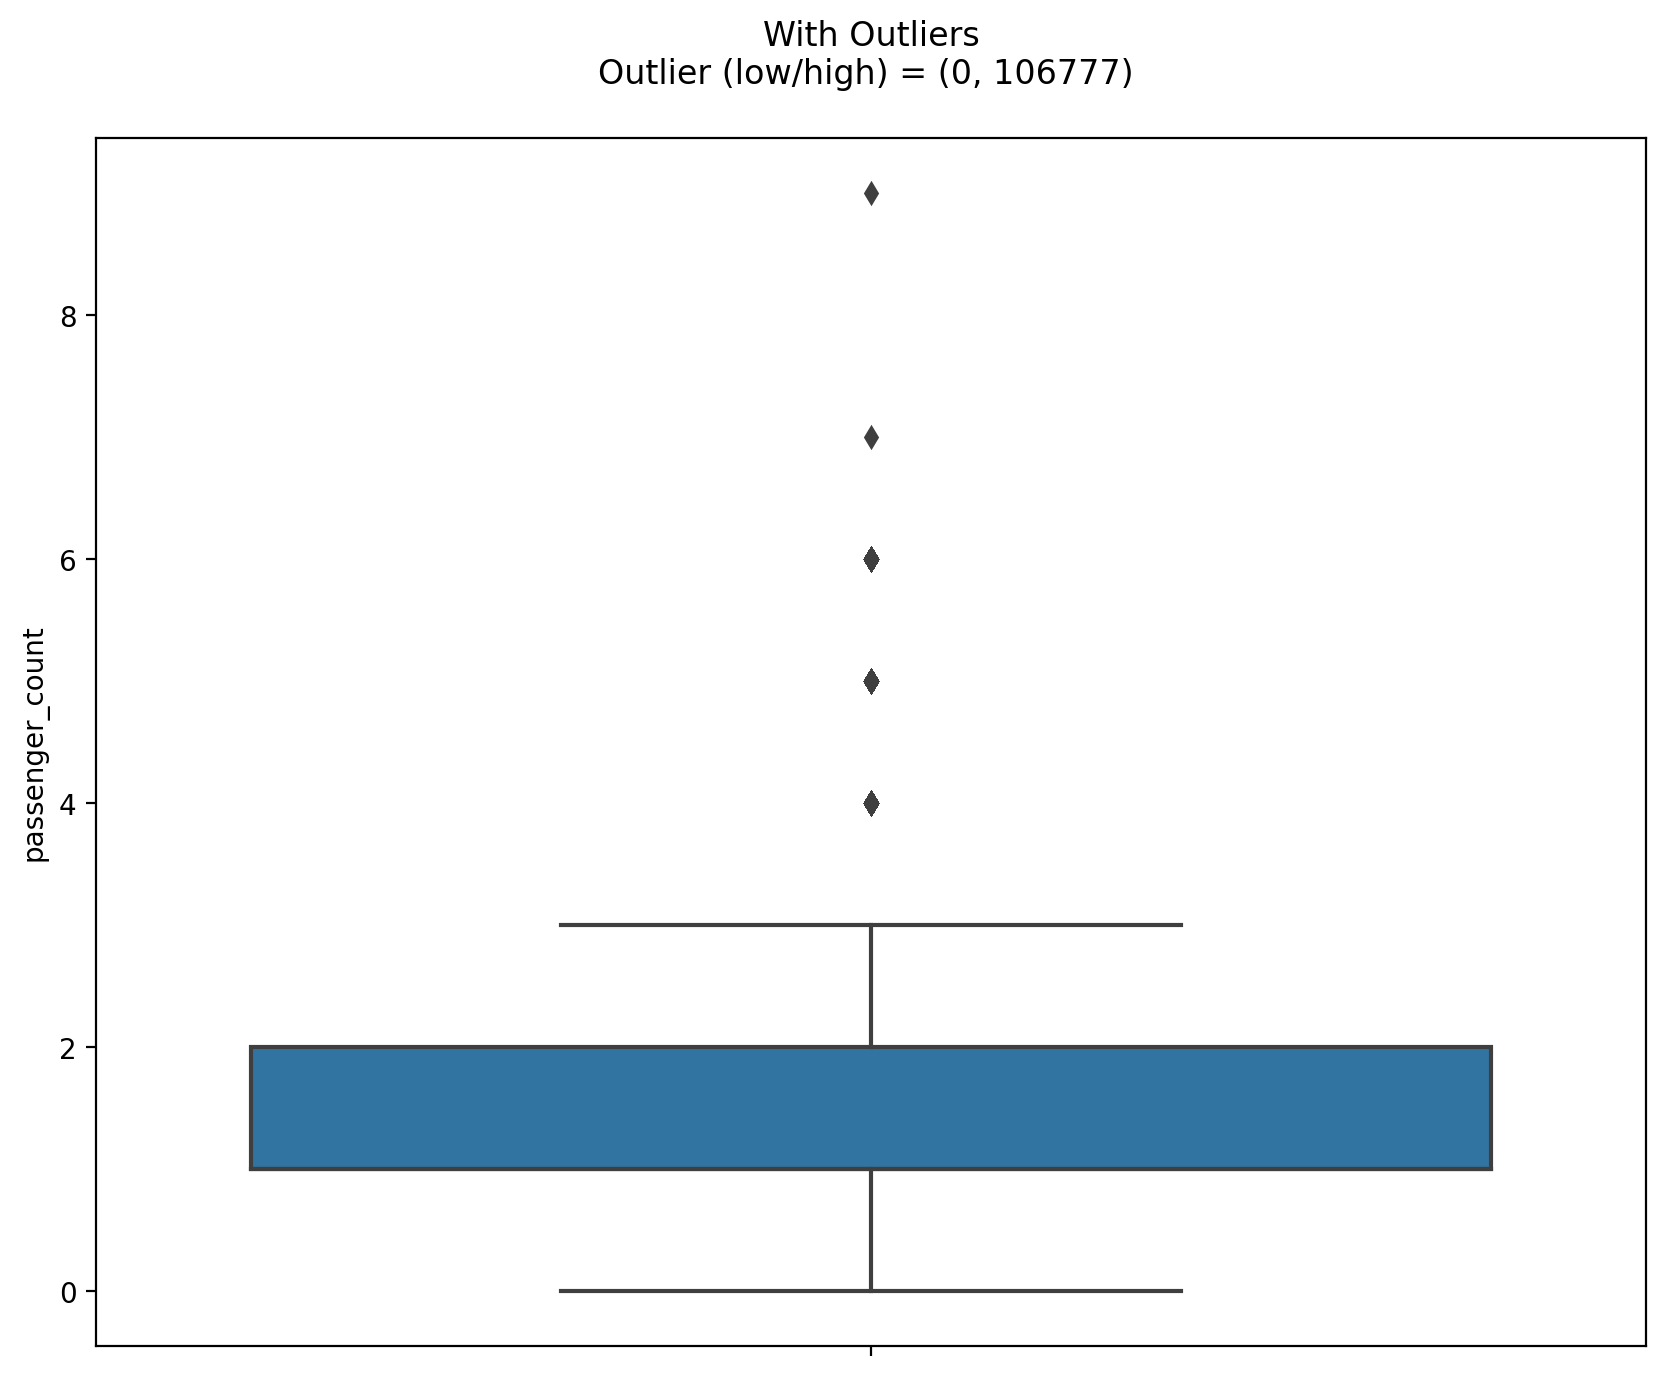

In [59]:
#changing passenger_count to integer datatype only for this section to work with the function 
data['passenger_count'] = data['passenger_count'].astype('int64')
UVA_outlier(data, ['passenger_count'],) 

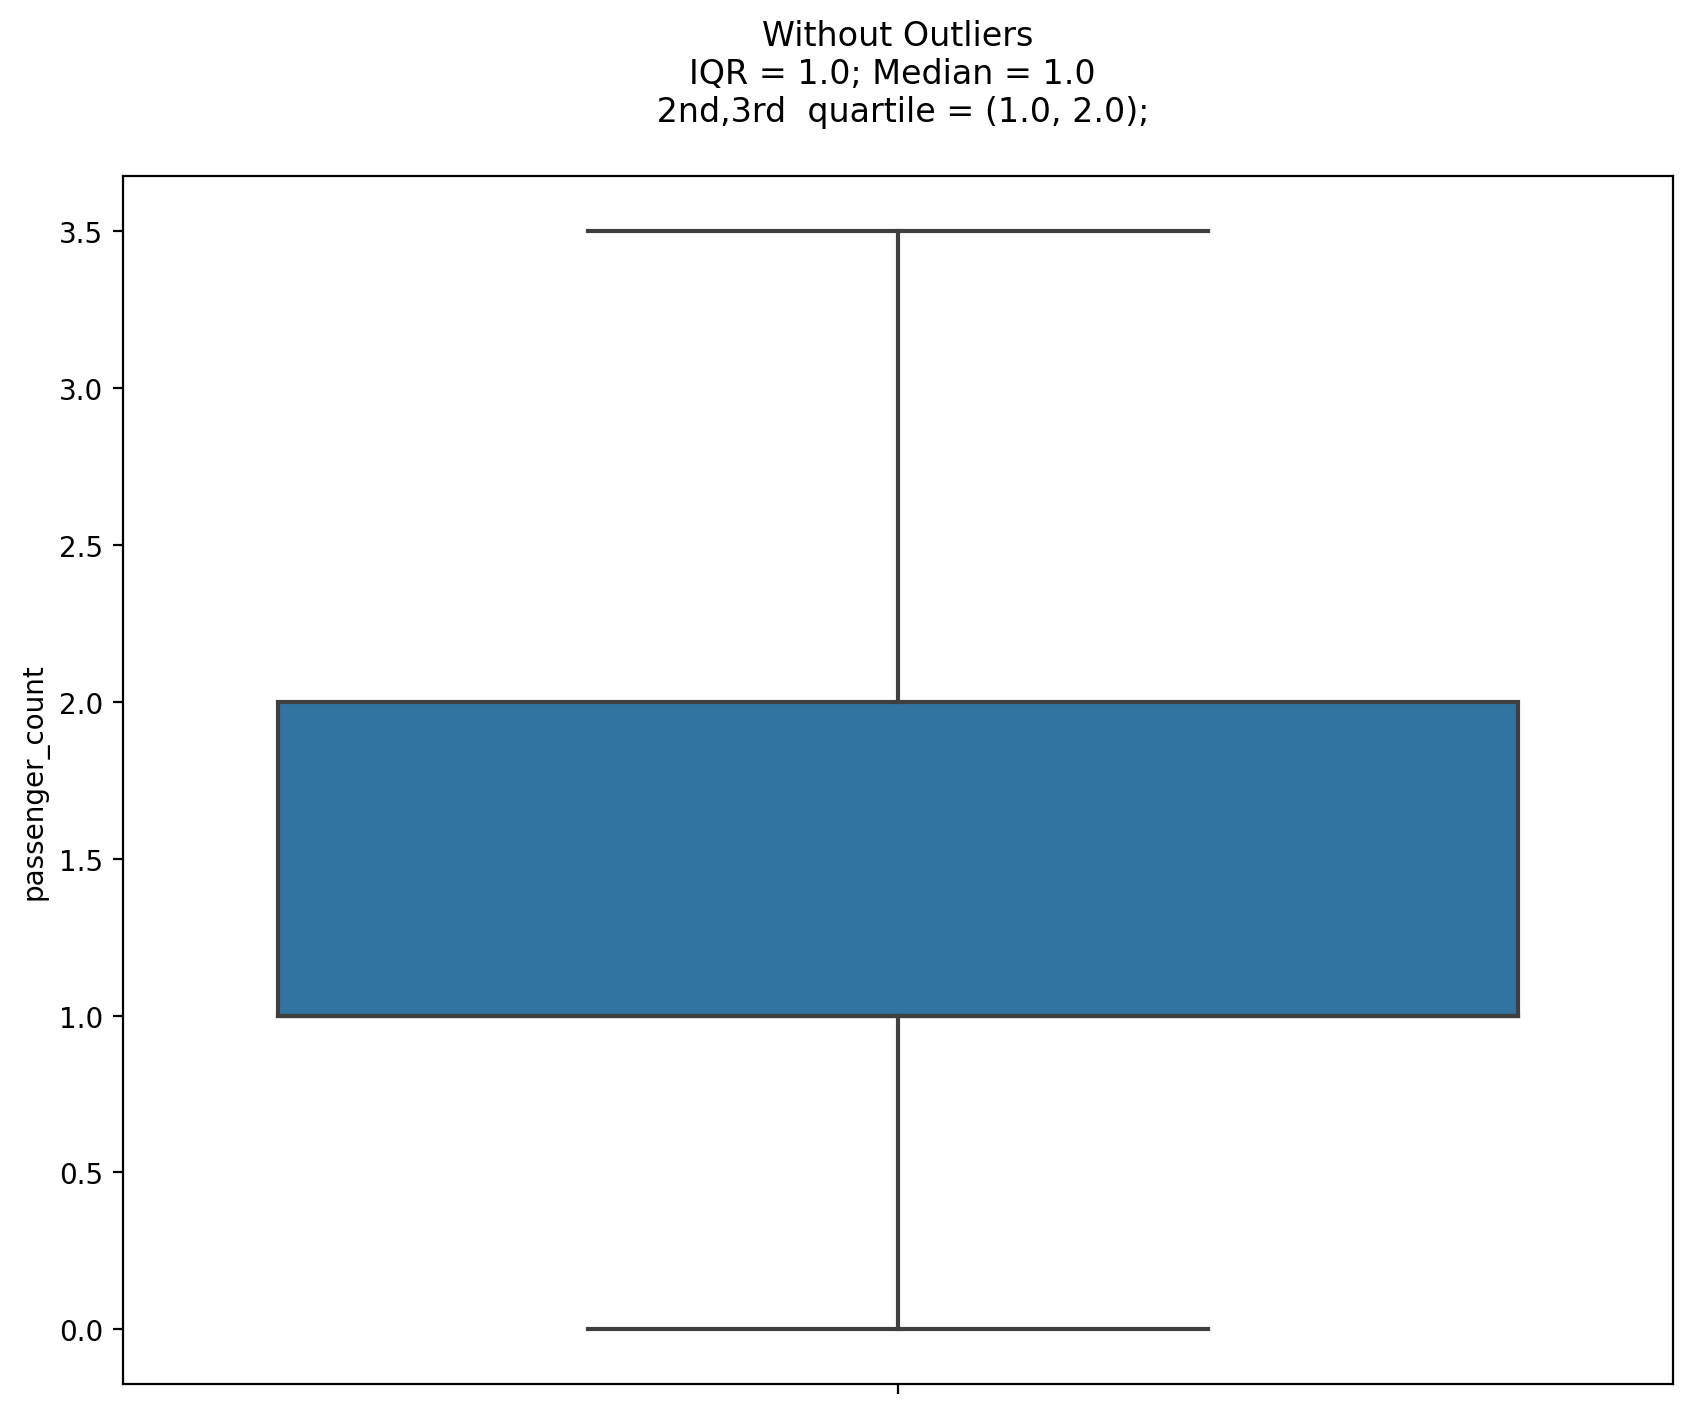

In [60]:
UVA_outlier(data, ['passenger_count'], include_outlier=False)

In [61]:
#revert back to categorical
data['passenger_count'] = data['passenger_count'].astype('category')

### pickup_dropoff_location

True
True
True
True


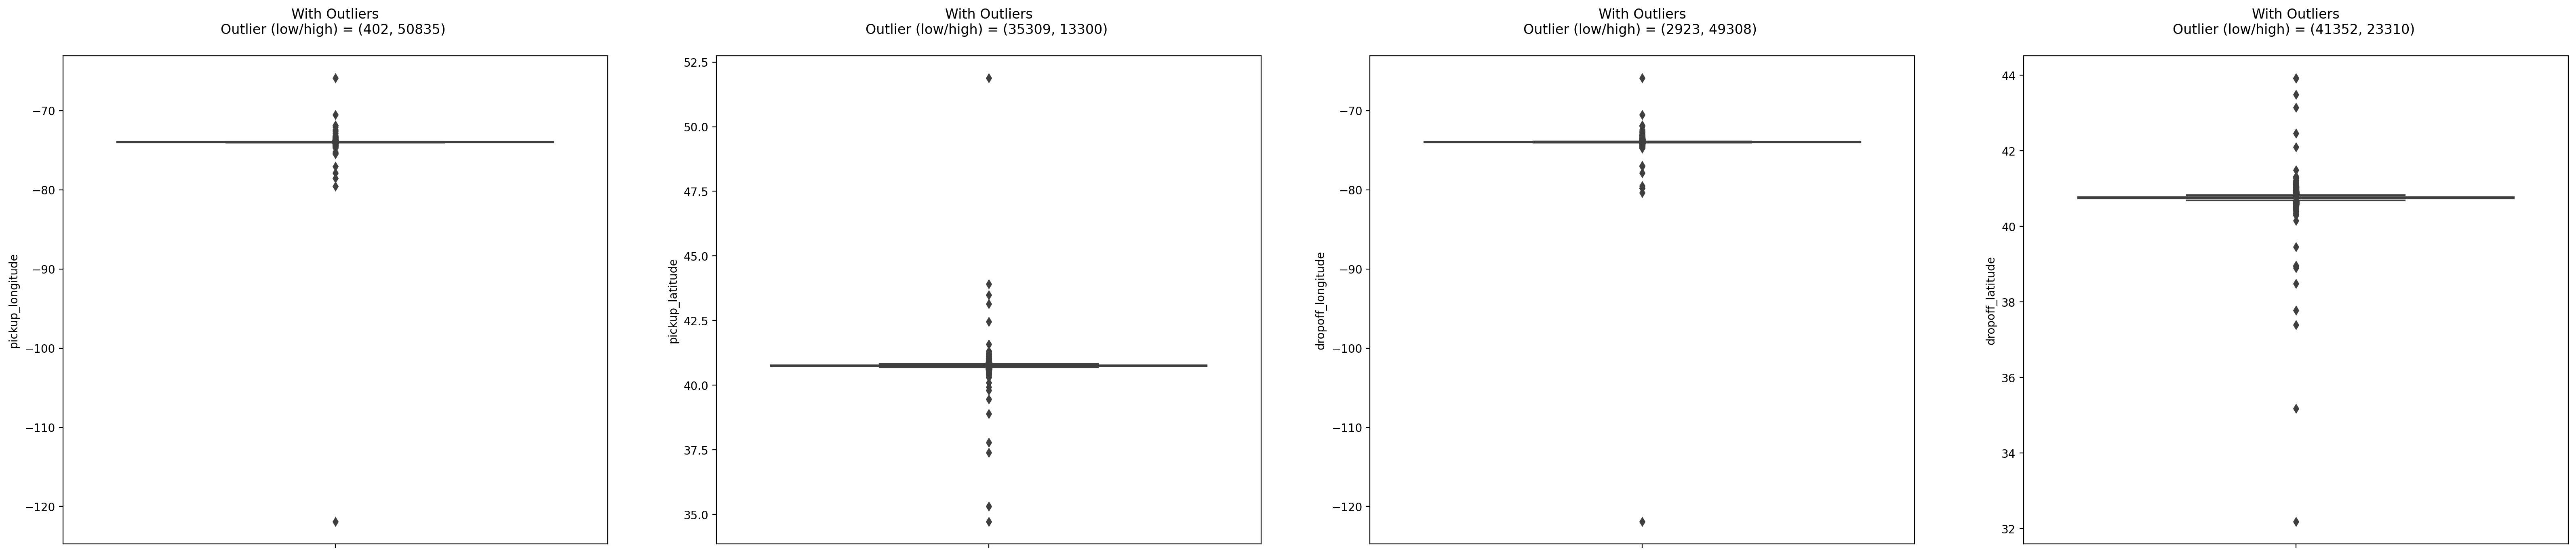

In [62]:
UVA_outlier(data, pickup_dropoff_location,)

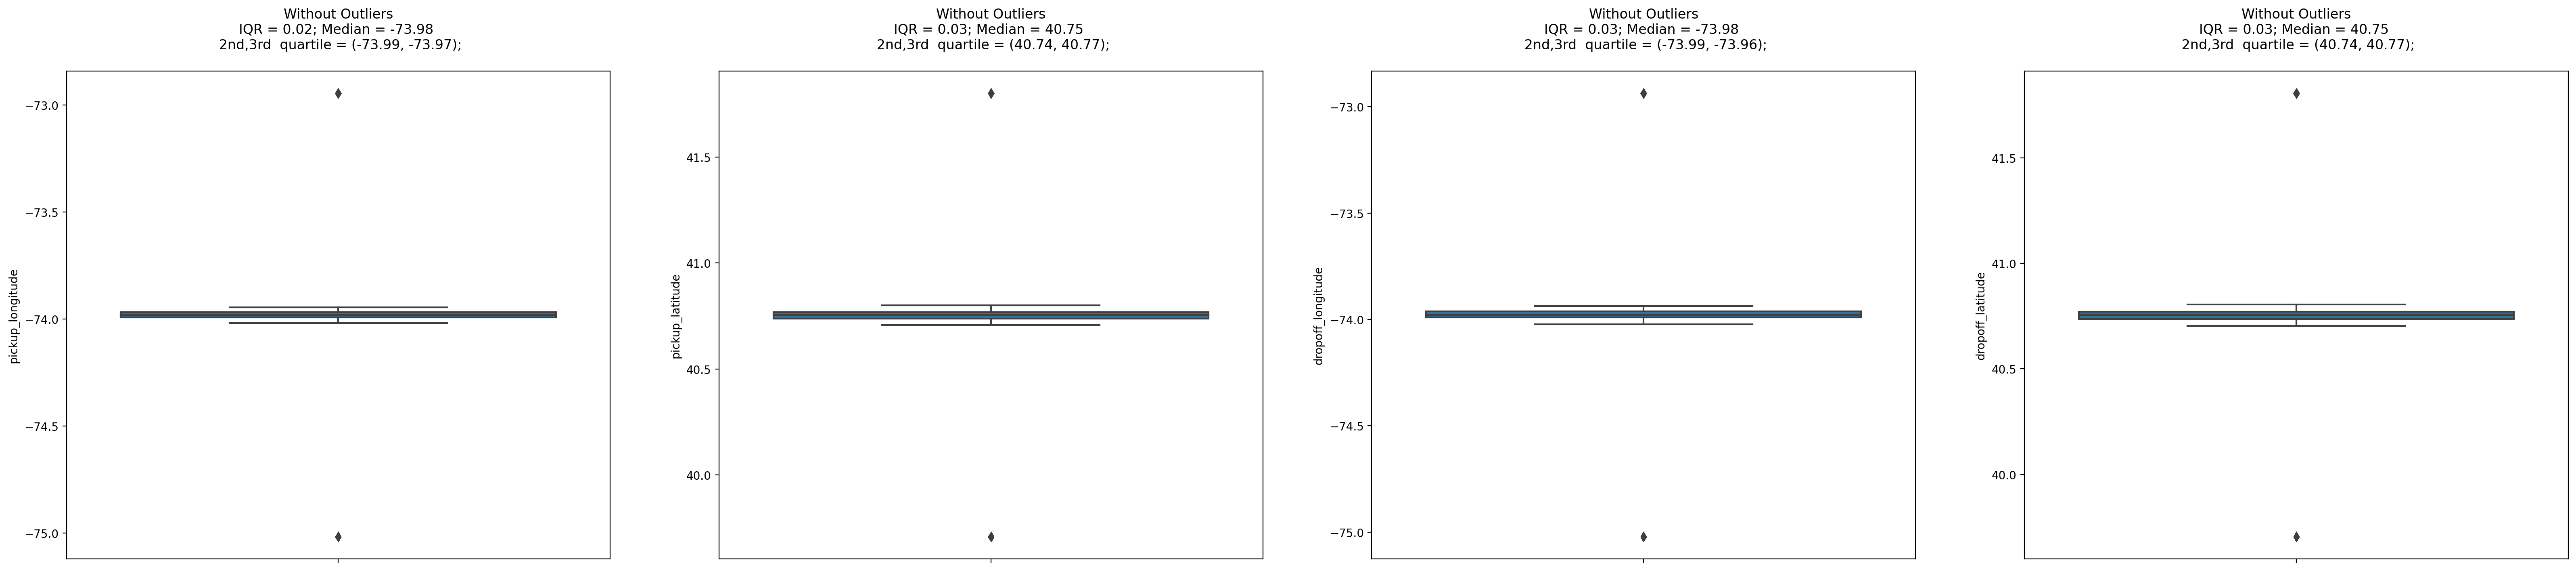

In [63]:
UVA_outlier(data, pickup_dropoff_location, include_outlier=False)

 ### trip_details

True
True
True
True


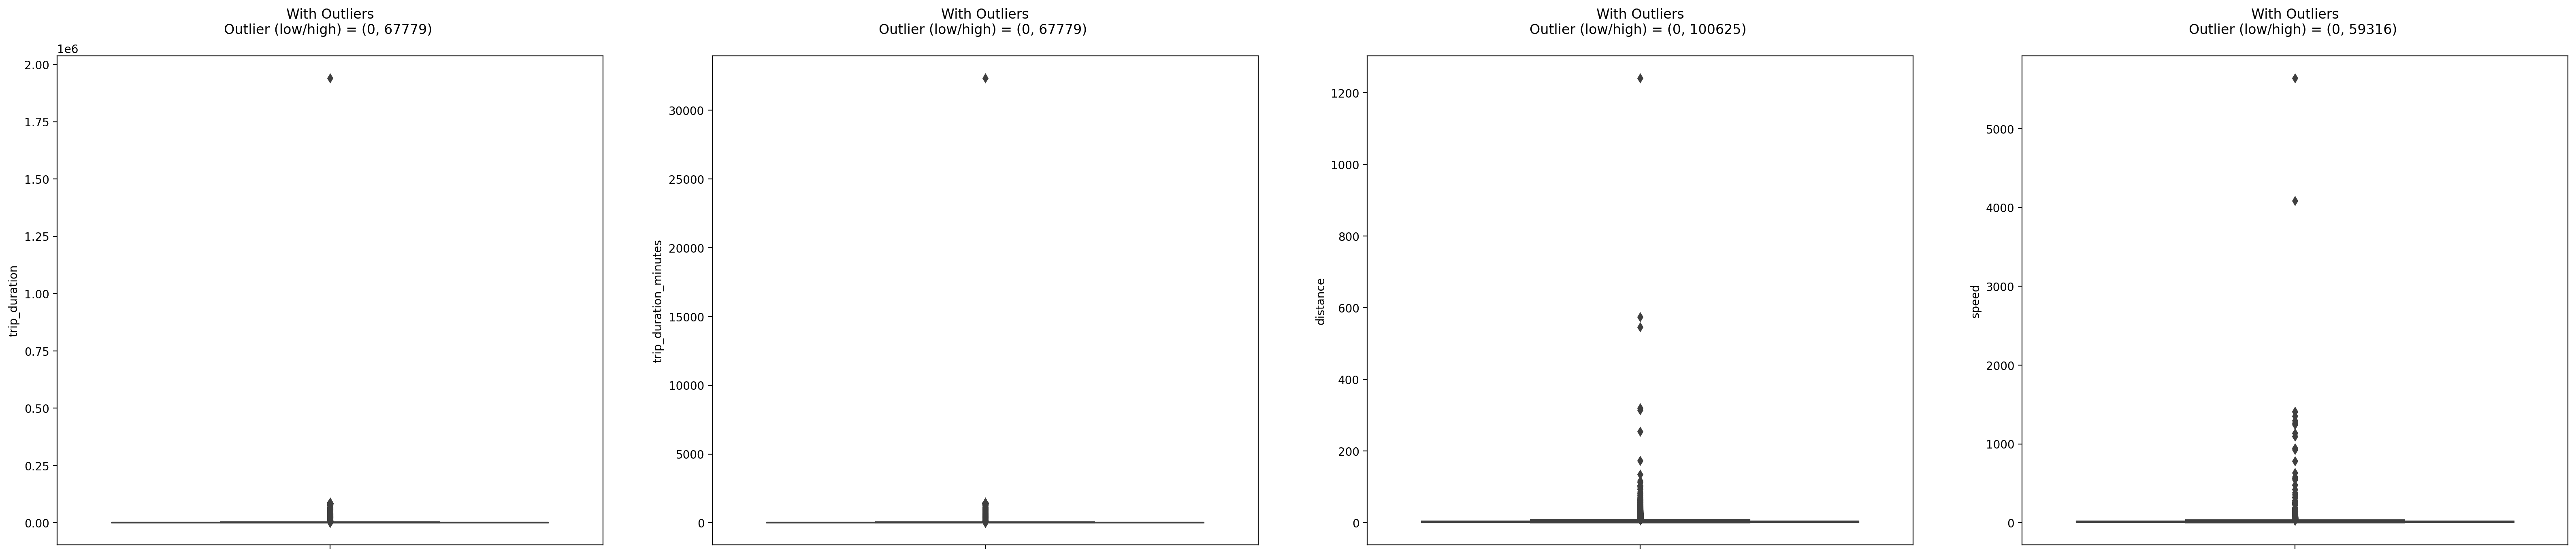

In [64]:
UVA_outlier(data, trip_details,)

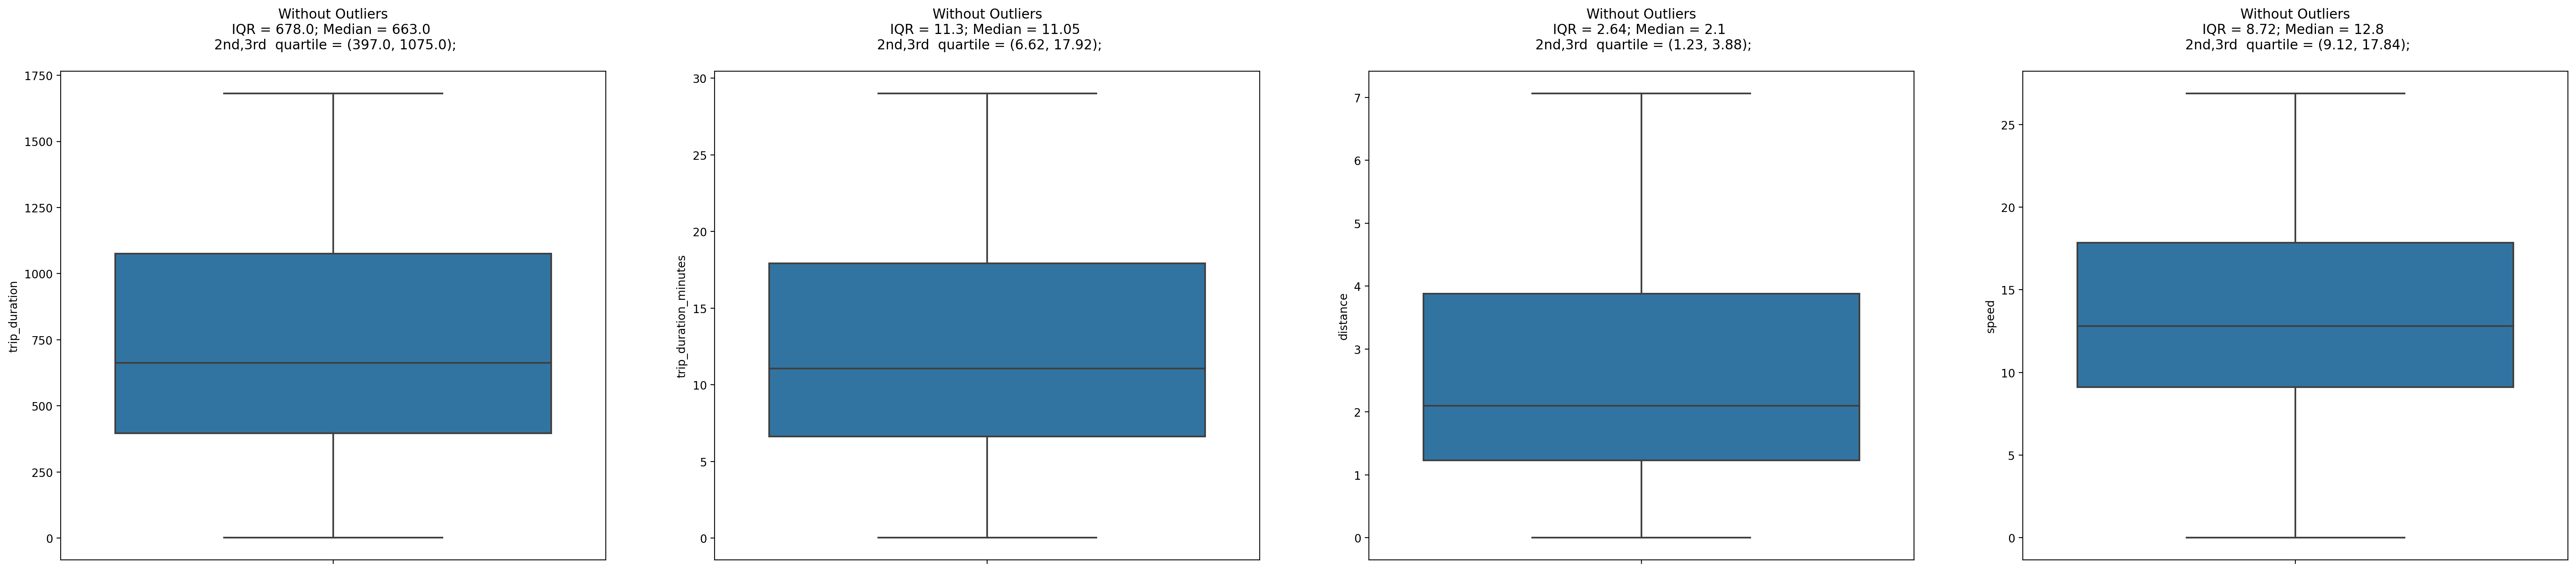

In [65]:
UVA_outlier(data, trip_details, include_outlier=False) 

### pickup_dropoff_time

True
True
True
True
True
True
True
True
True
True


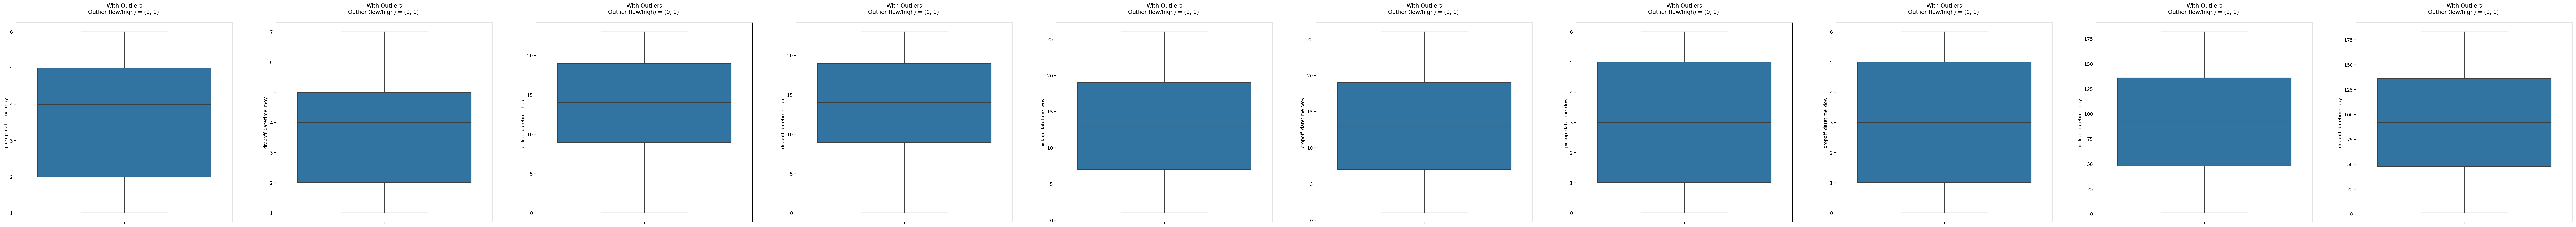

In [66]:
UVA_outlier(data, pickup_dropoff_time,)

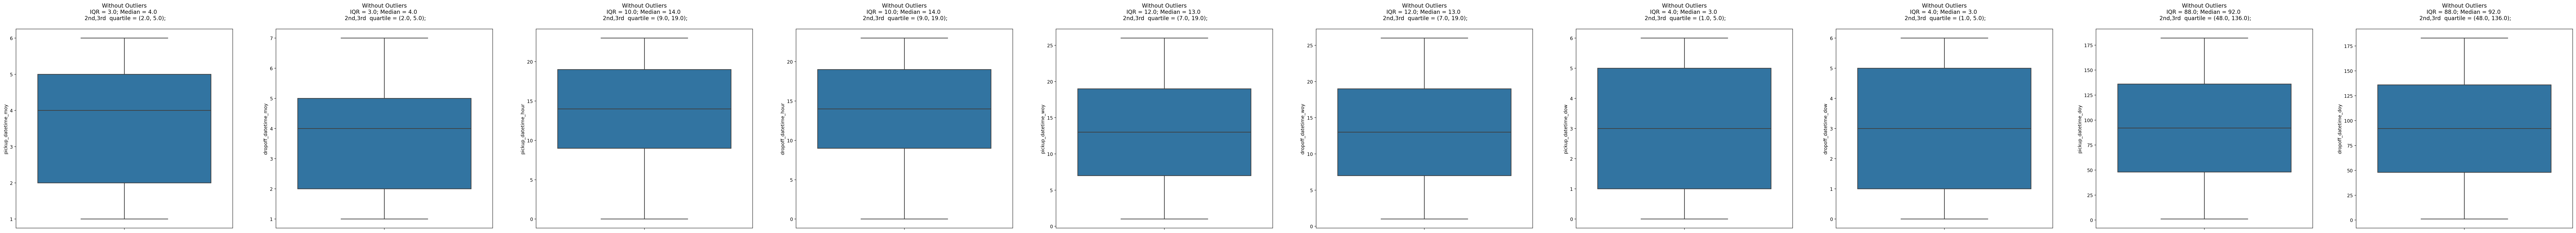

In [67]:
UVA_outlier(data, pickup_dropoff_time, include_outlier=False) 

## Bivariate Analysis : Numerical-Numerical

In [68]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
trip_duration              int64
trip_duration_minutes    float64
distance                 float64
speed                    float64
pickup_datetime_moy        int64
pickup_datetime_hour       int64
pickup_datetime_woy        int64
pickup_datetime_dow        int64
pickup_datetime_doy        int64
dropoff_datetime_moy       int64
dropoff_datetime_hour      int64
dropoff_datetime_woy       int64
dropoff_datetime_dow       int64
dropoff_datetime_doy       int64
dtype: object

In [69]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

pickup_longitude  pickup_latitude  dropoff_longitude  \
pickup_longitude               1.000000         0.047635           0.780647   
pickup_latitude                0.047635         1.000000           0.119970   
dropoff_longitude              0.780647         0.119970           1.000000   
dropoff_latitude               0.118473         0.479352           0.149598   
trip_duration                  0.035447        -0.038163           0.020664   
trip_duration_minutes          0.035447        -0.038163           0.020664   
distance                       0.251482        -0.128455           0.132353   
speed                          0.095274         0.116824           0.045954   
pickup_datetime_moy            0.004037        -0.000165           0.003883   
pickup_datetime_hour           0.010754         0.011433          -0.022014   
pickup_datetime_woy            0.004415        -0.000245           0.003875   
pickup_datetime_dow           -0.016031        -0.029073          -0.001473   
pickup_datetime_doy            0.003737        -0.001244           0.003762   
dropoff_datetime_moy           0.004090        -0.000233           0.003923   
dropoff_datetime_hour          0.011170         0.018061          -0.023193   
dropoff_datetime_woy           0.004472        -0.000304           0.003897   
dropoff_datetime_dow          -0.016846        -0.029254          -0.001396   
dropoff_datetime_doy           0.003764        -0.001313           0.003787   

                       dropoff_latitude  trip_duration  trip_duration_minutes  \
pickup_longitude               0.118473       0.035447               0.035447   
pickup_latitude                0.479352      -0.038163              -0.038163   
dropoff_longitude              0.149598       0.020664               0.020664   
dropoff_latitude               1.000000      -0.028283              -0.028283   
trip_duration                 -0.028283       1.000000               1.000000   
trip_duration_minutes         -0.028283       1.000000               1.000000   
distance                      -0.153760       0.125772               0.125772   
speed                         -0.054265      -0.028189              -0.028189   
pickup_datetime_moy           -0.000580       0.009378               0.009378   
pickup_datetime_hour           0.014257       0.002979               0.002979   
pickup_datetime_woy           -0.000832       0.009518               0.009518   
pickup_datetime_dow           -0.022028      -0.002302              -0.002302   
pickup_datetime_doy           -0.001627       0.009418               0.009418   
dropoff_datetime_moy          -0.000621       0.010135               0.010135   
dropoff_datetime_hour          0.018173       0.003027               0.003027   
dropoff_datetime_woy          -0.000861       0.010392               0.010392   
dropoff_datetime_dow          -0.022396      -0.003369              -0.003369   
dropoff_datetime_doy          -0.001673       0.010285               0.010285   

                       distance     speed  pickup_datetime_moy  \
pickup_longitude       0.251482  0.095274             0.004037   
pickup_latitude       -0.128455  0.116824            -0.000165   
dropoff_longitude      0.132353  0.045954             0.003883   
dropoff_latitude      -0.153760 -0.054265            -0.000580   
trip_duration          0.125772 -0.028189             0.009378   
trip_duration_minutes  0.125772 -0.028189             0.009378   
distance               1.000000  0.575073             0.016581   
speed                  0.575073  1.000000            -0.016809   
pickup_datetime_moy    0.016581 -0.016809             1.000000   
pickup_datetime_hour  -0.016269 -0.064608            -0.003301   
pickup_datetime_woy    0.017097 -0.018132             0.985359   
pickup_datetime_dow    0.007786  0.044305            -0.013626   
pickup_datetime_doy    0.017201 -0.016932             0.985661   
dropoff_datetime_moy   0.016759 -0.016782             0.9

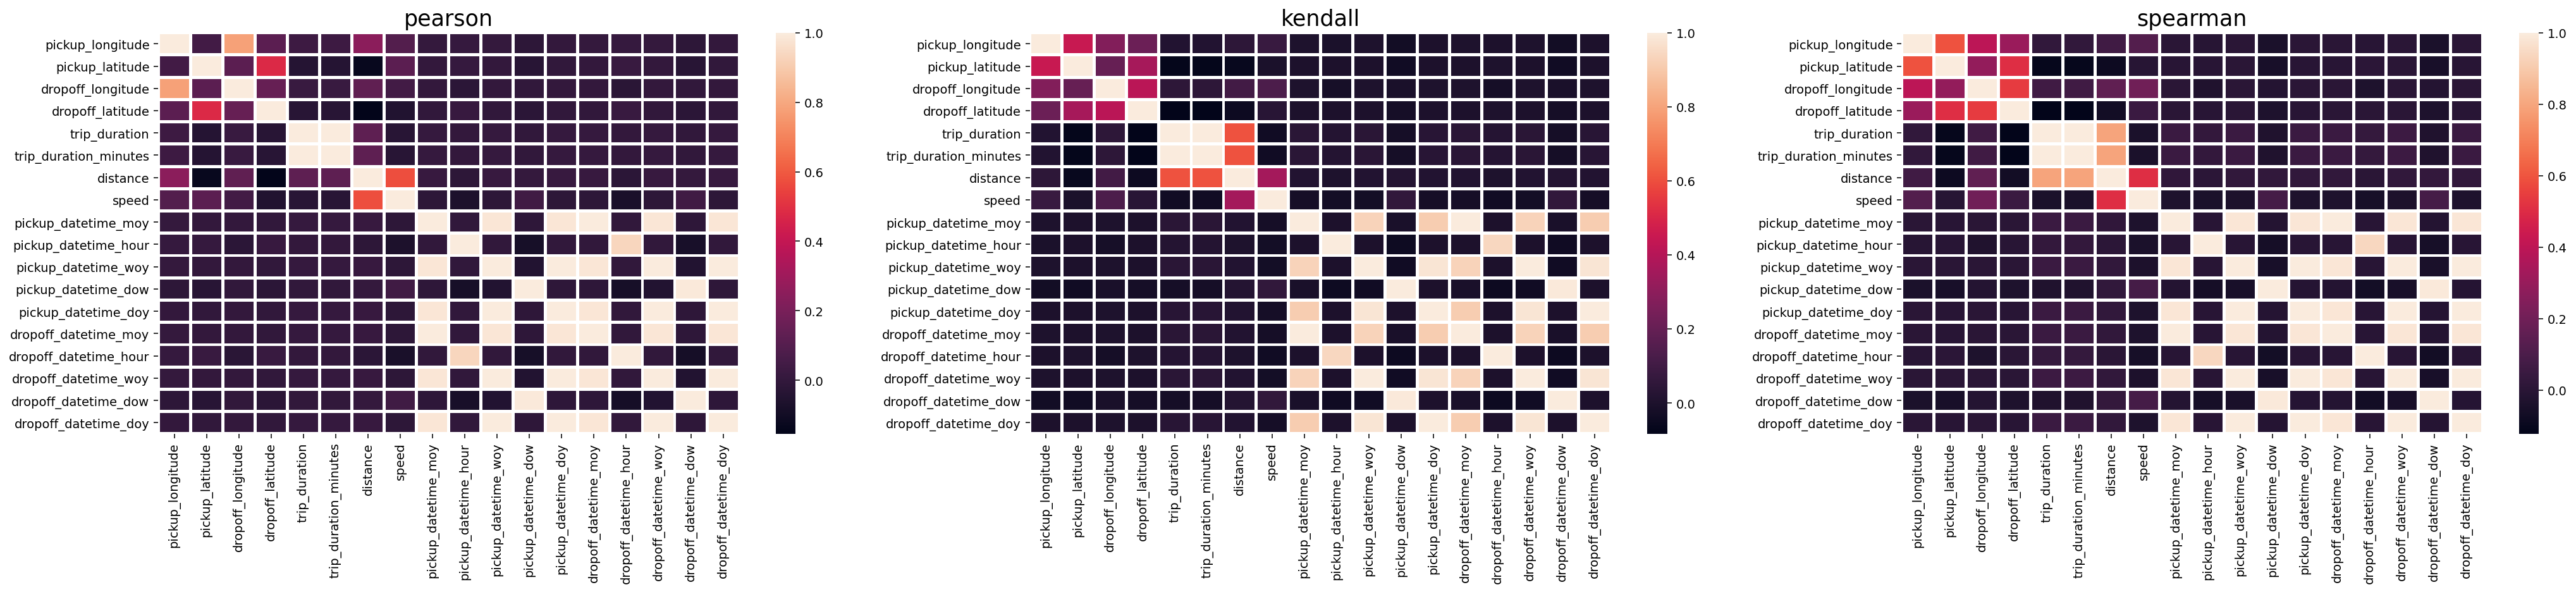

In [70]:
# plotting heatmap using Pearson Coeff, Kendall's Tau, and Spearman Coeff for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* The Spearman correlation seems to have higher correlation values in same areas of the heatmap where they are less in the Pearson and Kendall correlations. 
*  Too many variables with insignificant correlation.
*  Major correlation lies between distance and trip duration variables, expectedly. **Hence, with these results, it would be more interesting to analyze correlations of numerical with categorical data.**

### Scatterplot


In [71]:
# Grouping variables
pickup_dropoff_location = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
trip_details = ['trip_duration','trip_duration_minutes', 'distance', 'speed']
pickup_dropoff_time = ['pickup_datetime_moy', 'dropoff_datetime_moy', 'pickup_datetime_hour', 'dropoff_datetime_hour', 'pickup_datetime_woy', 'dropoff_datetime_woy', 'pickup_datetime_dow', 'dropoff_datetime_dow', 'pickup_datetime_doy', 'dropoff_datetime_doy']

<Figure size 840x560 with 0 Axes>

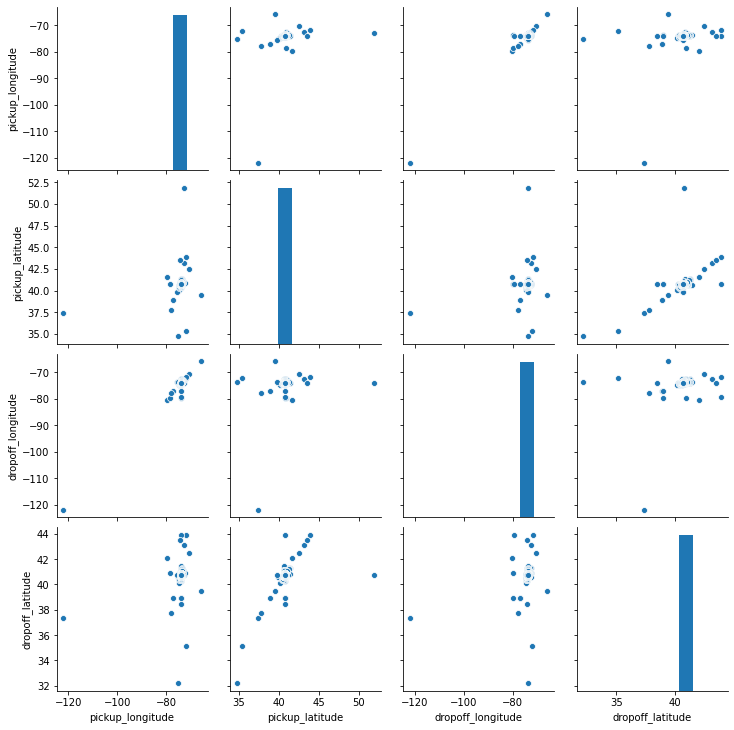

In [72]:
# scatter plot for pickup_dropoff_location variables
plt.figure(dpi=140)
sns.pairplot(numerical[pickup_dropoff_location])

**The scatter plot is is not meaningful due to the presence of outliers**

In [73]:
#taking log of every value and dividing by 100,000 to negate outliers
var = []
var.extend(pickup_dropoff_location)
var.extend(trip_details)
var.extend(pickup_dropoff_time)
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x)/100000)

<Figure size 840x560 with 0 Axes>

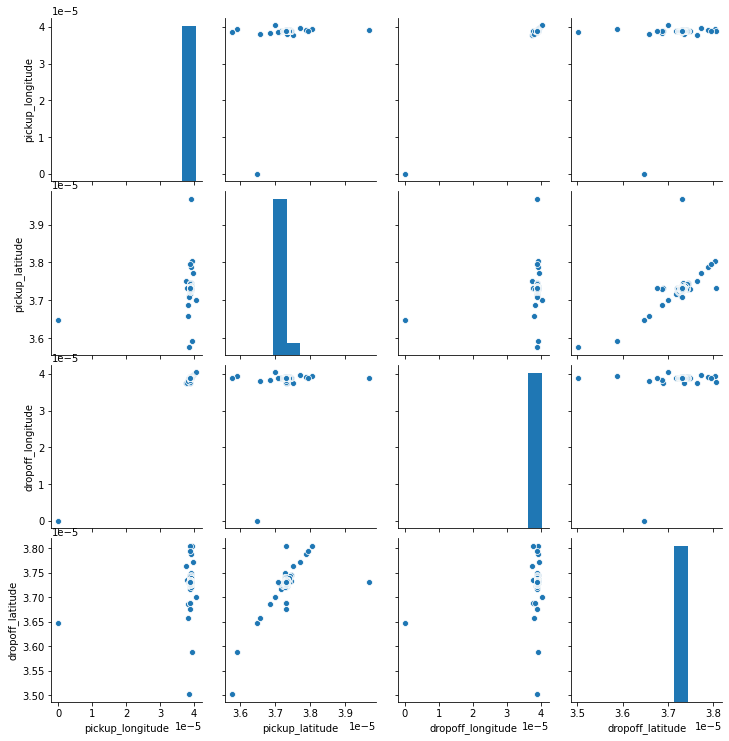

In [74]:
# scatter plot for pickup_dropoff_location variables
plt.figure(dpi=140)
sns.pairplot(numerical[pickup_dropoff_location])

**Inferences**
1.    After negating a lot of outliers, a higher positive correlation between pickup_latitude and dropoff_latitude is observed.
2.    A correlation was still not observed between pickup_longitude and dropoff_longitude.

<Figure size 840x560 with 0 Axes>

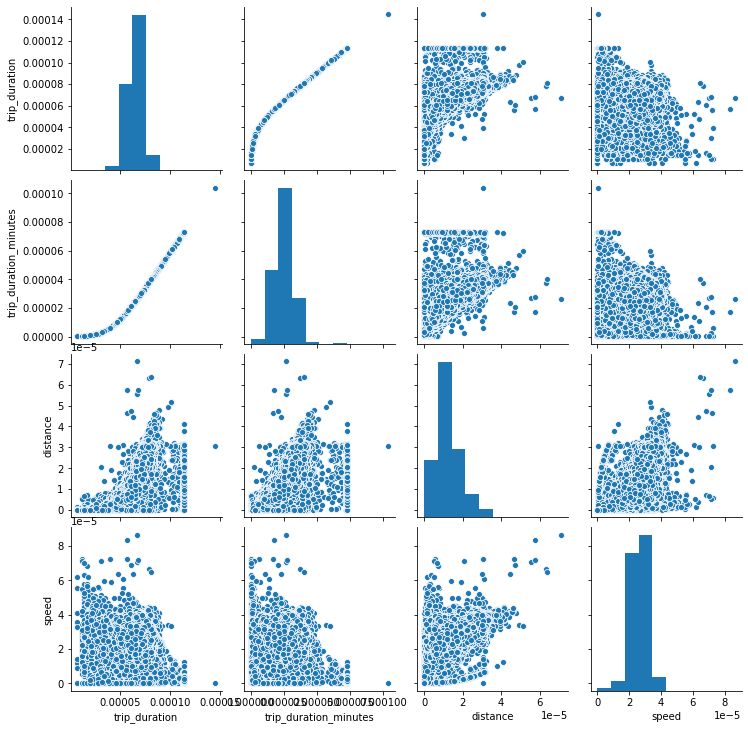

In [75]:
# scatter plot for trip_details variables
plt.figure(dpi=140)
sns.pairplot(numerical[trip_details])

**Inferences**
1.    This validates the high correlation between distance and trip duration variables. We also observe positive correlations between speed and other variables of the trip_details group.
2.    This high correlation can be used for feature engineering during later stages.

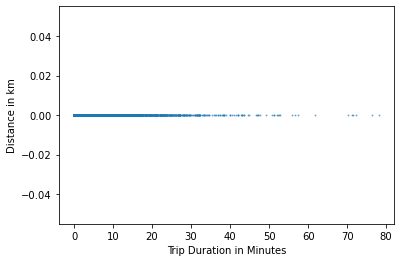

In [76]:
#if we remember from Univariate Analysis, we found that there were approx. 3000 observations with distance=0. We shall use a scatter plot to analyze the relation between this distance value and trip_duration_minutes
filtered_dist = data.loc[(data.distance == 0) & (data.trip_duration_minutes < 120), ['distance','trip_duration_minutes']]
plt.scatter(filtered_dist.trip_duration_minutes, filtered_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance in km')
plt.xlabel('Trip Duration in Minutes')
plt.show()

In [77]:
data.distance.mean()

3.441143400649962

**From the scatterplot above, it would be better to replace these distance values with their mean value rather than deleting them. We shall pursue this in the data preprocessing section.**

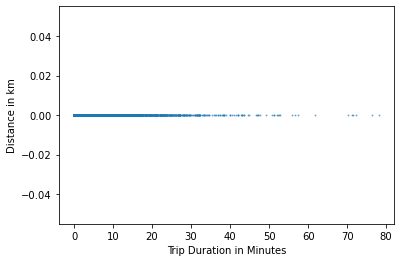

In [78]:
#if we also remember from Univariate Analysis, we found that there were approx. 3000 observations with distance=0. We shall use a scatter plot to analyze the relation between this distance value and trip_duration_minutes
filtered_dist = data.loc[(data.distance == 0) & (data.trip_duration_minutes < 120), ['distance','trip_duration_minutes']]
plt.scatter(filtered_dist.trip_duration_minutes, filtered_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance in km')
plt.xlabel('Trip Duration in Minutes')
plt.show()

<Figure size 840x560 with 0 Axes>

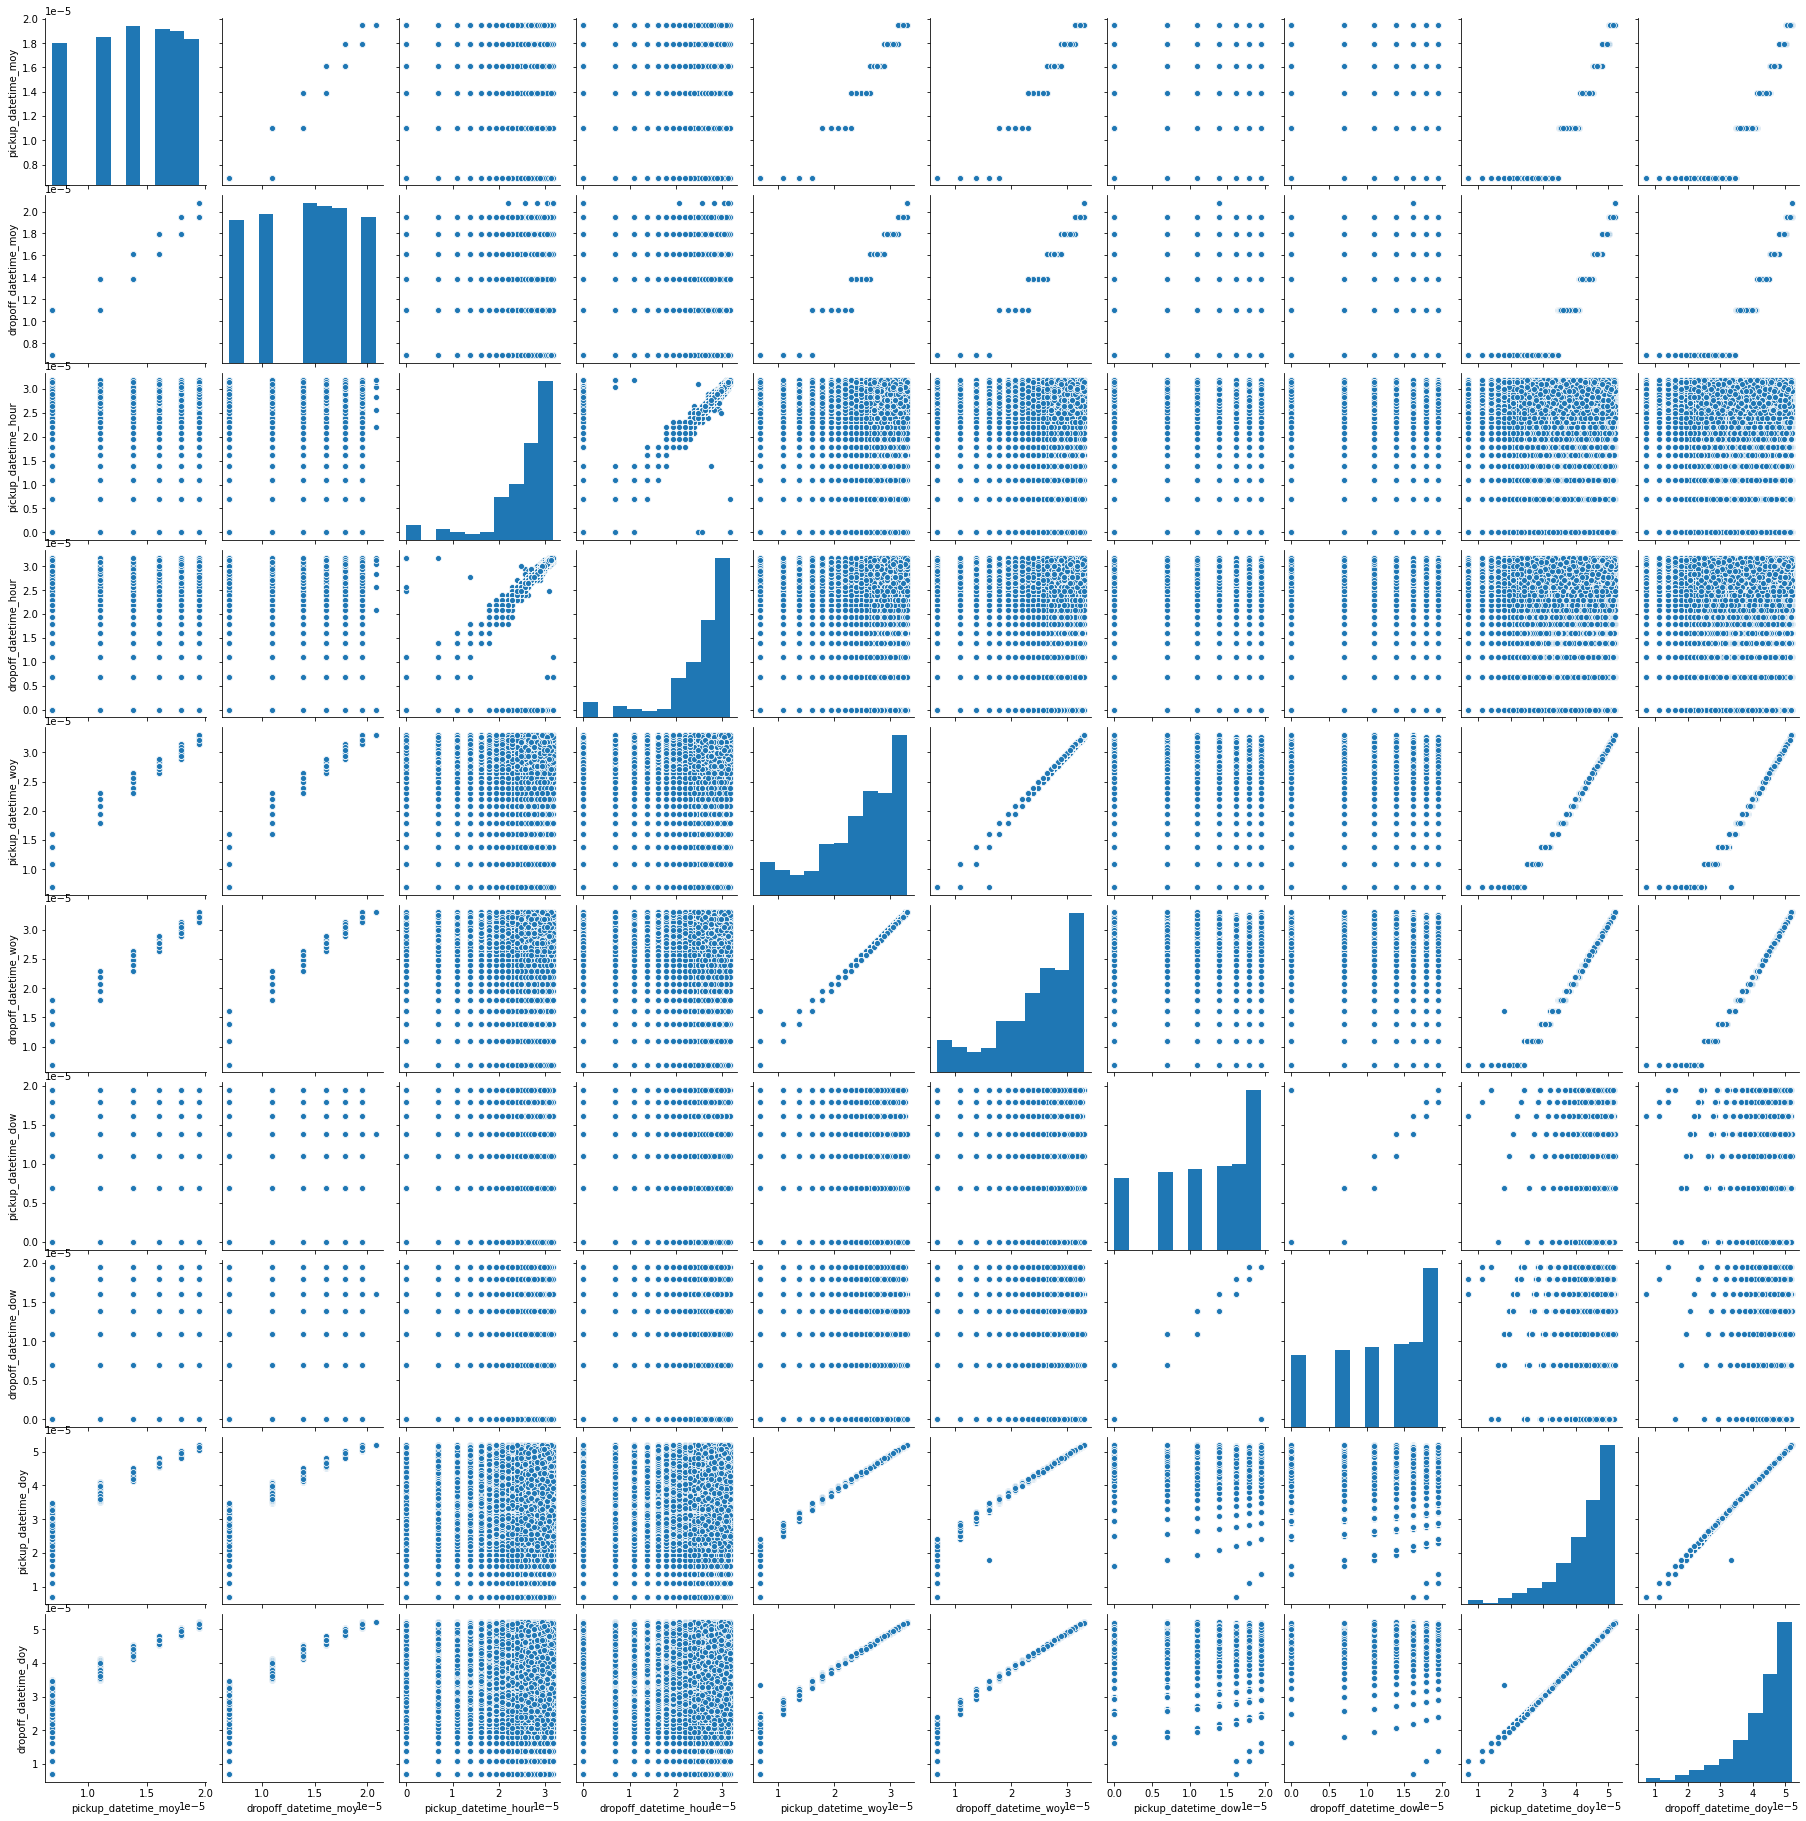

In [79]:
# scatter plot for pickup_dropoff_time variables
plt.figure(dpi=140)
sns.pairplot(numerical[pickup_dropoff_time])

**Inferences**
1.    This validates our finding that there exist many outliers in our pickup_dropoff_time data. Moreover, there is no apparent correlation present between the pickup_dropoff_time variables.

## Bivariate Analysis: Continuous-Categorical variables


**List of Hypotheses and investigation to perform under this combination.**

1.  Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to have higher trip durations?
2.  Is Vendor 1 less likely to deal with higher trip durations than Vendor 2 does?
3.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, experience higher trip duration?
4. Do taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel greater distances?
5. Does Vendor 2 deal with higher distances to travel than Vendor 1 does?
6. Do taxis that store and forward trips, because the vehicle did not have a connection to the server, travel greater distances?

In [80]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [81]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [82]:
def Bivariate_cont_cat_hypoth1(data, cont, cat):
  #creating 2 samples, passenger_counts <= 2 (x1) and 2 < passenger_counts < 7 (x2)
  x1 = data[cont][data[cat].isin([0,1,2])][:]
  x2 = data[cont][data[cat].isin([3,4,5,6])][:]
                  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(['passenger_counts <= 2','2 < passenger_counts < 7'], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### **1.  Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to have higher trip durations?**

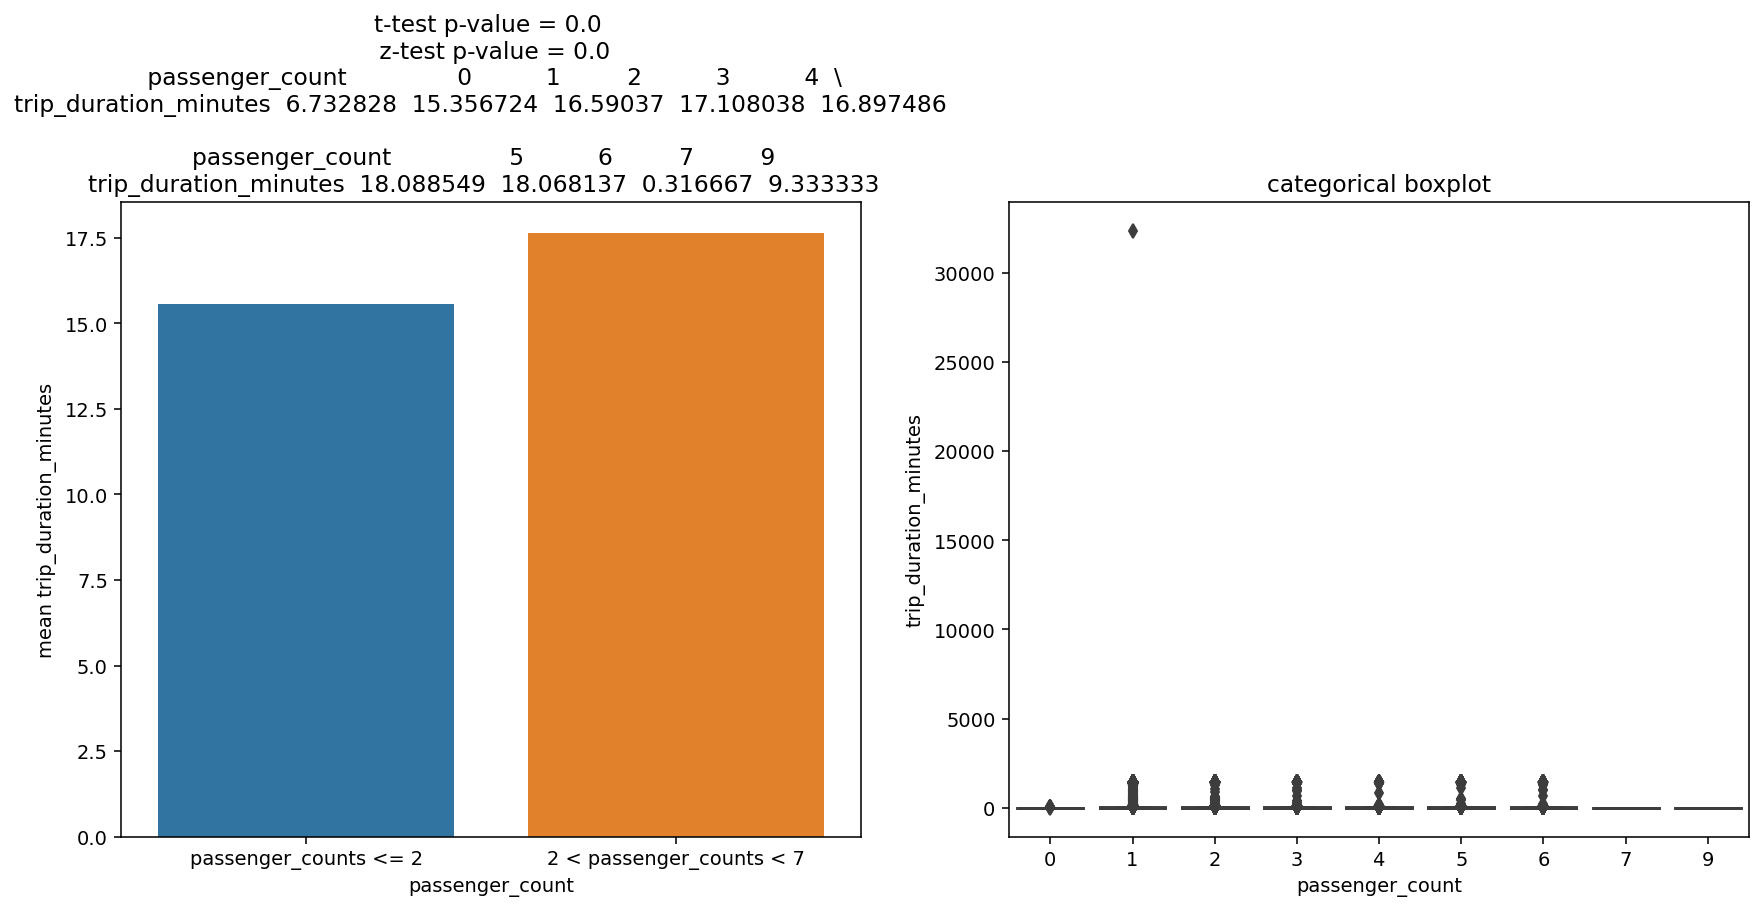

In [83]:
Bivariate_cont_cat_hypoth1(data, 'trip_duration_minutes', 'passenger_count') 

**Inferences**

1.    Taxis carrying more than 2 but less than 7 passengers (to remove outlier passenger of 7 and 9) had higher trip durations, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly.

**Result**

We can confidently reject the null hypothesis that taxis with higher passenger_counts, greater than 2 passengers but less than 7 passengers, are less likely to have higher trip durations.

### **2.  Is Vendor 1 less likely to deal with higher trip durations than Vendor 2 does?**

In [84]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'2'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

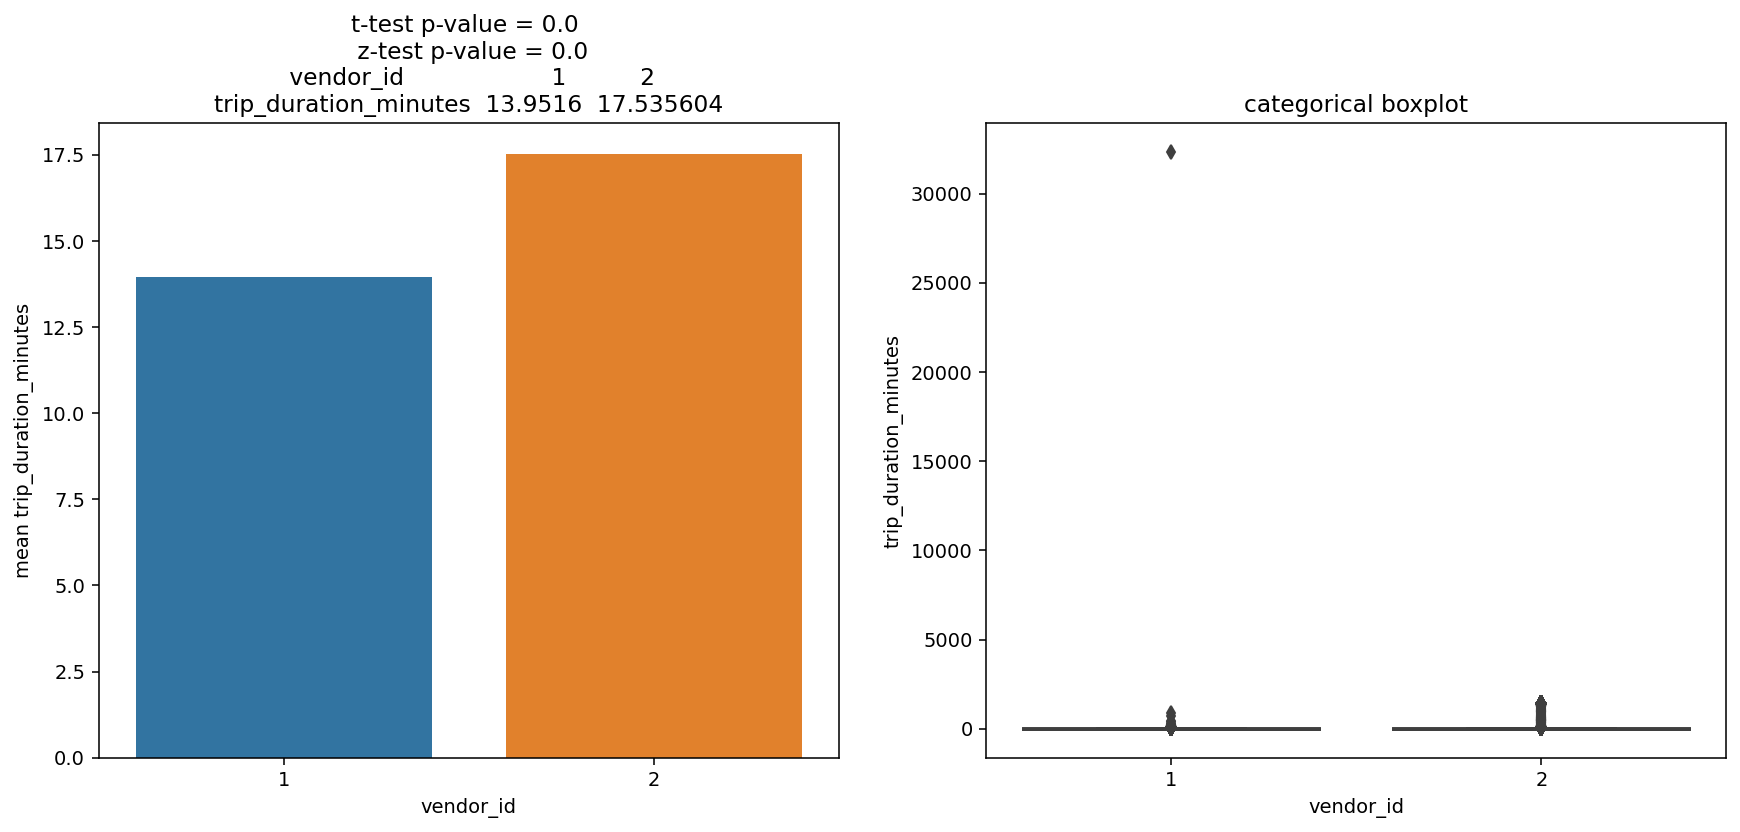

In [85]:
Bivariate_cont_cat(data, 'trip_duration_minutes', 'vendor_id', 1)

**Inferences**

1.    Taxis carrying more than 2 but less than 7 passengers (to remove outlier passenger of 7 and 9) had higher trip durations, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Boxplot shows a similar distribution, although with high outliers for vendor 1, and this further reinforces the above relation.

**Result**

We can confidently reject the null hypothesis that Vendor 1 is more likely to deal with higher trip durations than Vendor 2 does.

### **3.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, experience higher trip duration?**

In [86]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'N'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

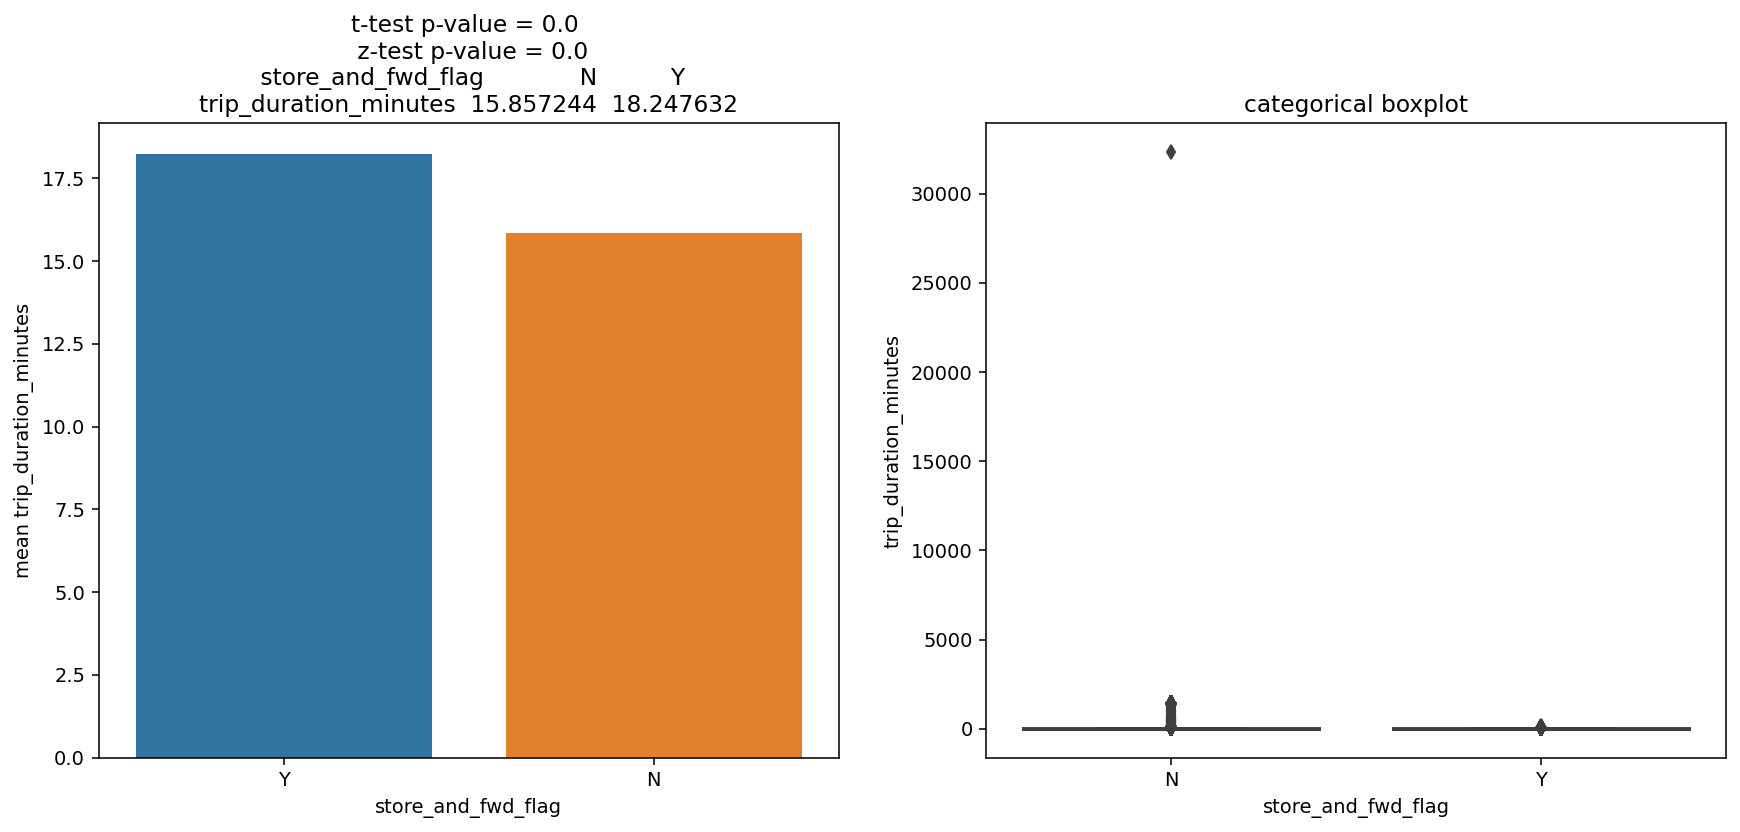

In [87]:
Bivariate_cont_cat(data, 'trip_duration_minutes', 'store_and_fwd_flag', 'Y')

**Inferences**

1.    Taxis that store and forward trips, because the vehicle did not have a connection to the server, did experience higher trip duration, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers in the taxis that did NOT store and forward trips, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly. 

**Result**

We can confidently reject the null hypothesis that taxis that store and forward trips, because the vehicle did not have a connection to the server, experience lower trip duration.

### **4.  Do taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel greater distances?**

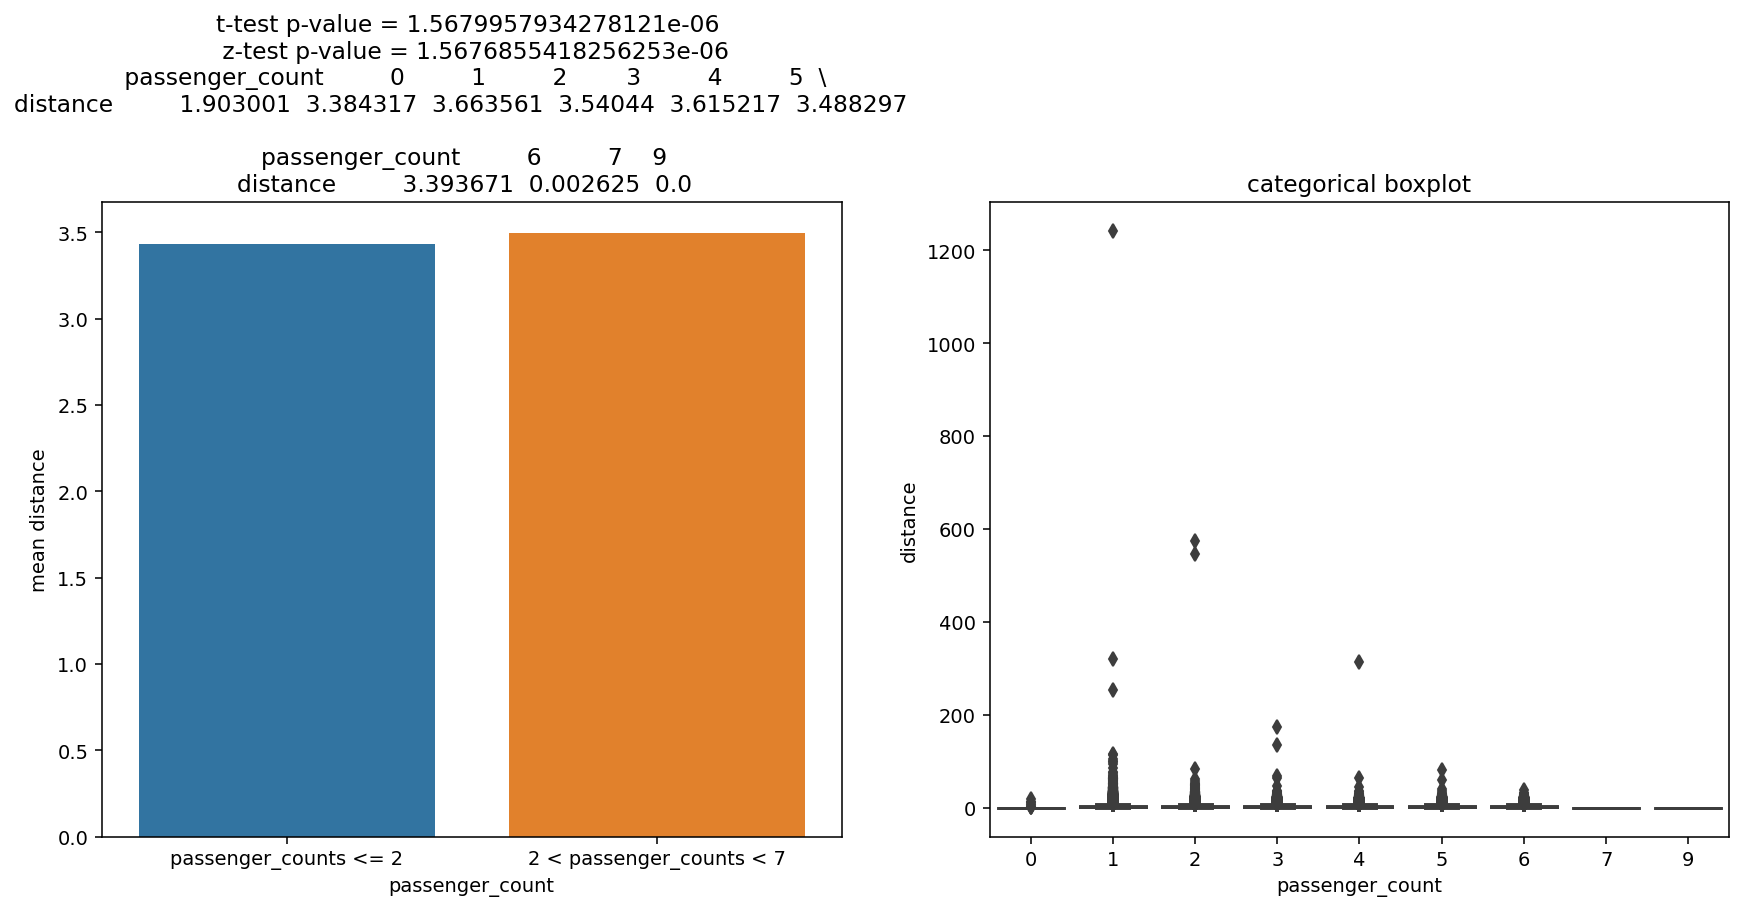

In [88]:
Bivariate_cont_cat_hypoth1(data, 'distance', 'passenger_count') 

**Inferences**

1.    Although taxis with higher passenger_counts, greater than 2 but less than 7 passengers, do travel greater distances as seen in the barplot, the p-value results are insignificant, as p-value > 0.05. 
2.    Although the boxplot represents that there are significant outliers for passenger_count 1 and 2, the distances travelled by those taxis are still a little less than their counterpart. 

**Result**

We cannot reject the null hypothesis that taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel less distances.

### **5.  Does Vendor 2 deal with higher distances to travel than Vendor 1 does?**

In [89]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'2'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

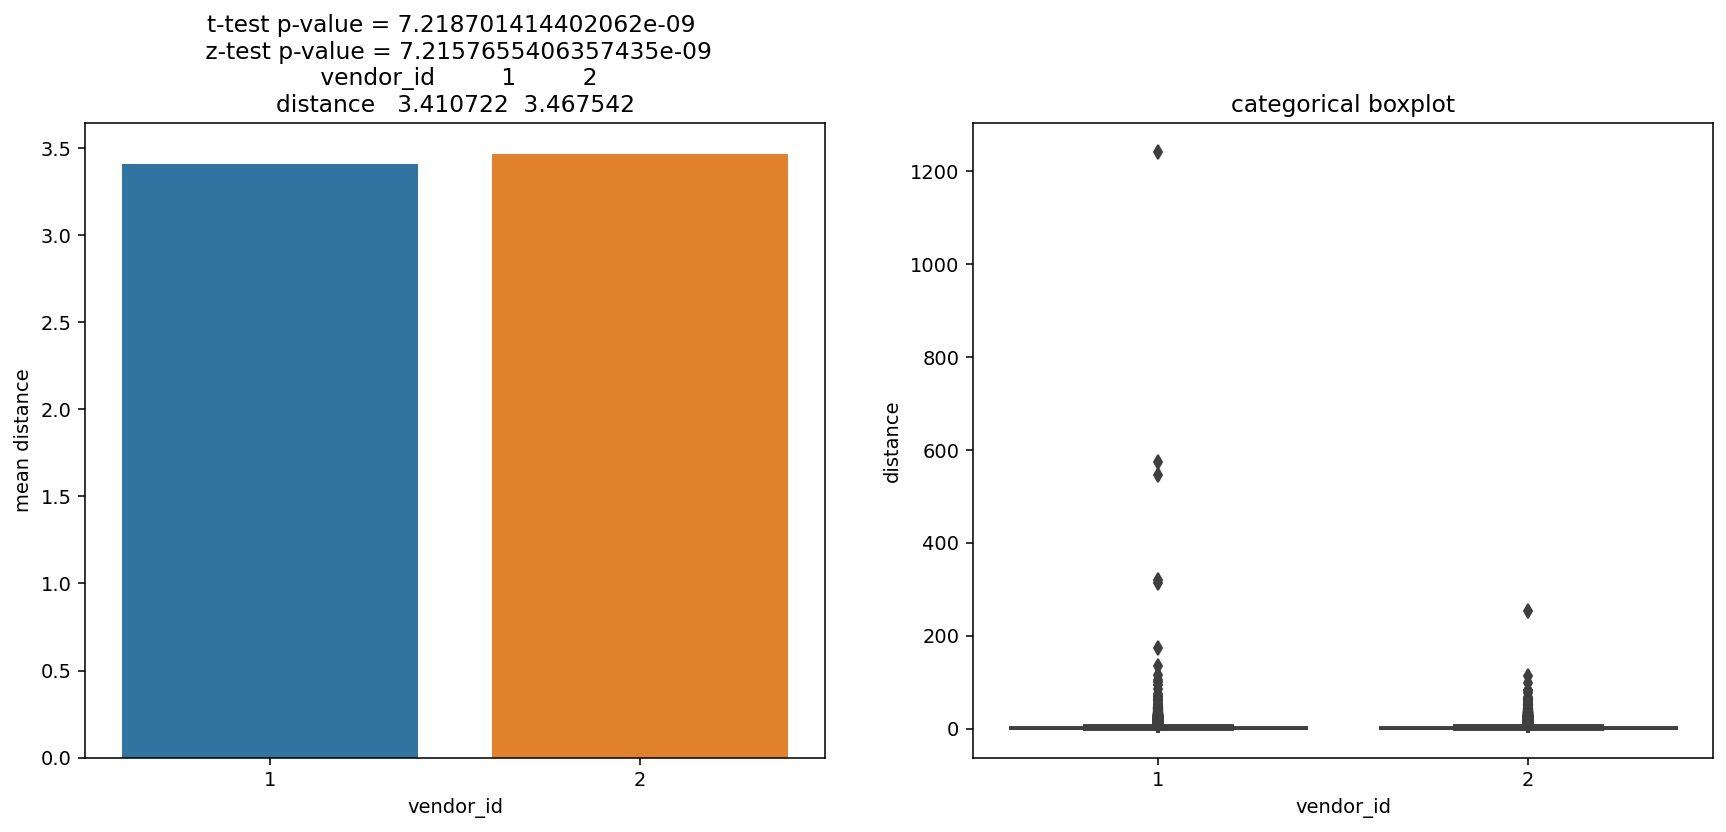

In [90]:
Bivariate_cont_cat(data, 'distance', 'vendor_id', 1)

**Inferences**

1.    Although Vendor 2 deals with higher distances to travel than Vendor 1 does as seen in the barplot and mean distance values, the p-value results are insignificant, as p-value > 0.05. 
2.    The boxplot represents that there are significant outliers for vendor 1, but lesser for vendor 2

**Result**

We cannot reject the null hypothesis that Vendor 2 deals with lower distances, on average, to travel than Vendor 1 does.

### **6.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, travel greater distances?**

In [91]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'N'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

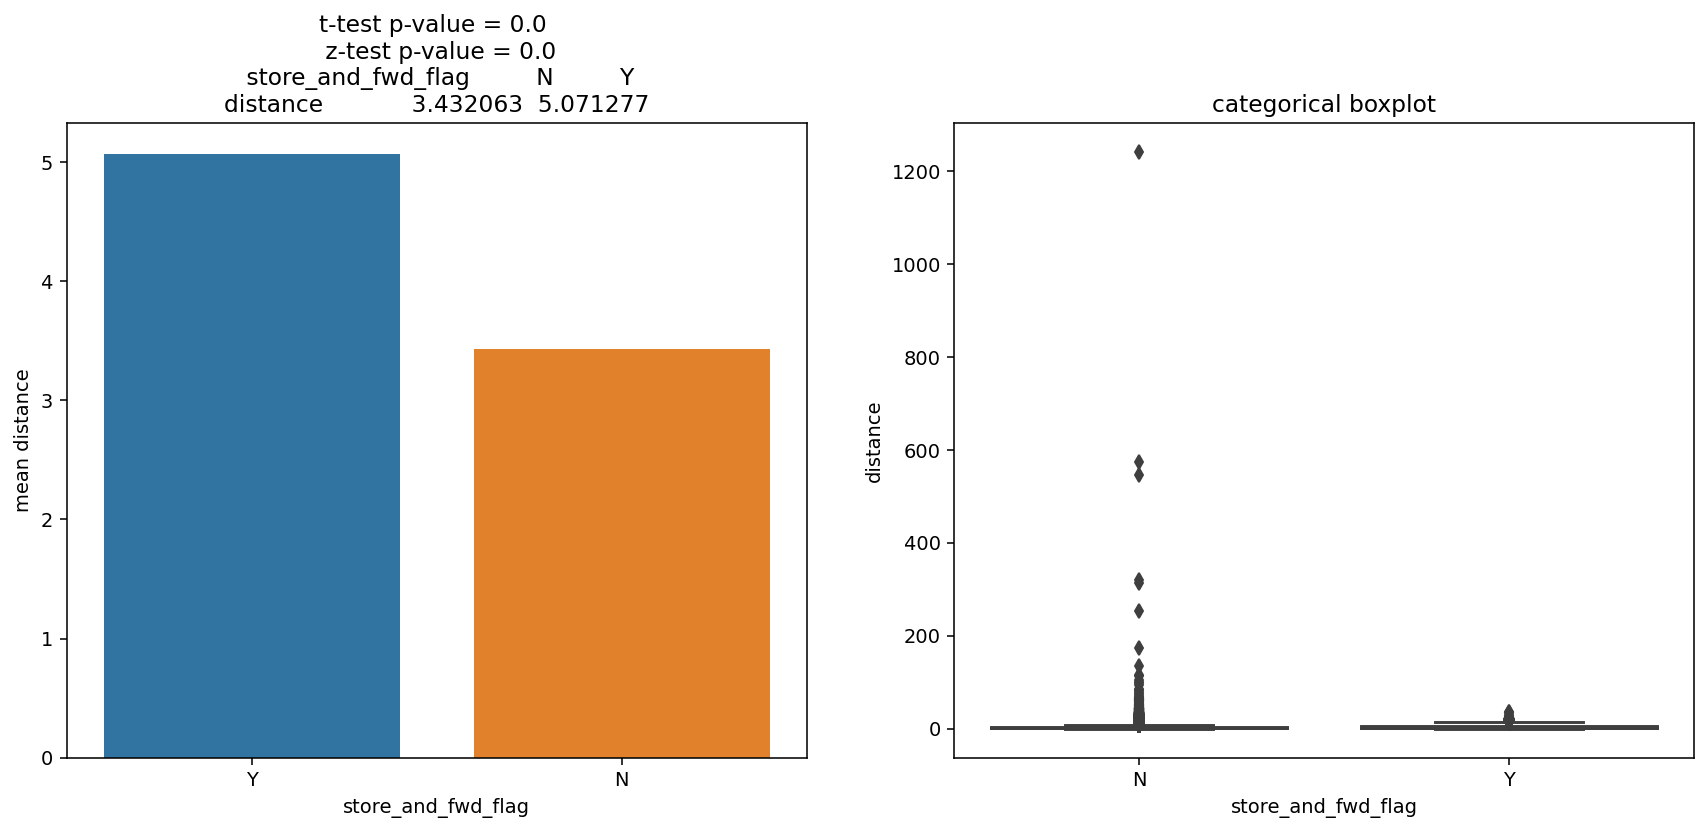

In [92]:
Bivariate_cont_cat(data, 'distance', 'store_and_fwd_flag', 'Y')

**Inferences**

1.    Taxis that store and forward trips, because the vehicle did not have a connection to the server, did significantly travel higher distances, as seen in the barplot, because p-value < 0.05. Results of the pivot table for  mean distance of taxis that store and forward trips are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers in the taxis that did NOT store and forward trips, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly. 

**Result**

We can confidently reject the null hypothesis that taxis that store and forward trips, because the vehicle did not have a connection to the server, did not travel greater distances.

## Bivariate : Categorical-Categorical

In [93]:
data.dtypes[data.dtypes == 'category']

id                    category
vendor_id             category
passenger_count       category
store_and_fwd_flag    category
dtype: object

#### List of Hypotheses to check under this combination
1.   Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to belong to Vendor 2?
2.   Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to store and forward trips, because the vehicle did not have a connection to the server?
3.   Does Vendor 2 deal with trips that are more likely to store and forward trips, because the vehicle did not have a connection to the server?

In [94]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

### 1.  Are taxis with higher passenger_count, greater than 2 but less than 7 passengers, more likely to belong to  Vendor 2?


In [95]:
# converting passenger_count to integer first, segregating customers into segments, removing passenger_count_group values of 'str'
data['passenger_count'] = data['passenger_count'].astype('int64')
vendor = data[['passenger_count','vendor_id']][:]
vendor['passenger_count_group'] = 'str'
vendor['passenger_count_group'][vendor['passenger_count']<=2] = 'low passenger count'
vendor['passenger_count_group'][(vendor['passenger_count']>2) & (vendor['passenger_count']<7)] = 'high passenger count'
vendor = vendor[vendor.passenger_count_group != 'str']


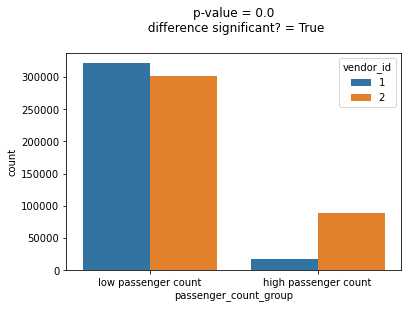

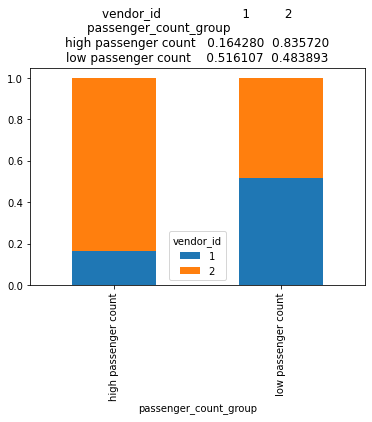

In [96]:
BVA_categorical_plot(vendor, 'vendor_id', 'passenger_count_group')

**Result**: Number of passengers in a taxi on a certain trip has a significant effect on which type of vendor they will ride with. Hence, we can reject the null hypothesis that taxis with higher passenger_count, greater than 2 but less than 7 passengers, are less likely to belong to Vendor 2.

### 2. Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to store and forward trips, because the vehicle did not have a connection to the server?

In [97]:
# converting passenger_count to integer first, segregating customers into segments, removing passenger_count_group values of 'str'
data['passenger_count'] = data['passenger_count'].astype('int64')
store_forward = data[['passenger_count','store_and_fwd_flag']][:]
store_forward['passenger_count_group'] = 'str'
store_forward['passenger_count_group'][store_forward['passenger_count']<=2] = 'low passenger count'
store_forward['passenger_count_group'][(store_forward['passenger_count']>2) & (store_forward['passenger_count']<7)] = 'high passenger count'
store_forward = store_forward[store_forward.passenger_count_group != 'str']


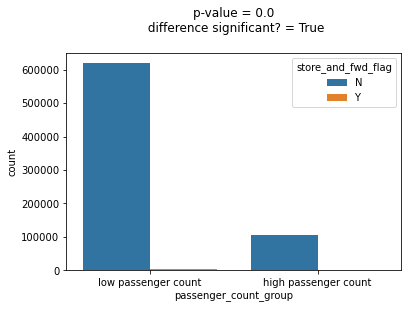

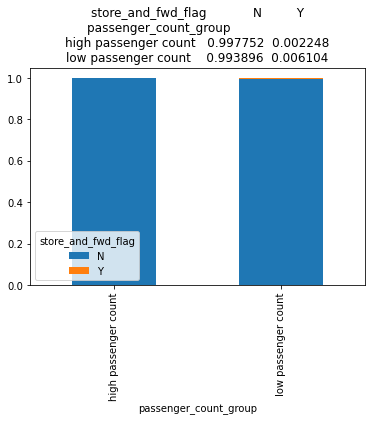

In [98]:
BVA_categorical_plot(store_forward, 'store_and_fwd_flag', 'passenger_count_group')

**Result**: Number of passengers in a taxi on a certain trip has a significant effect on whether the trip record was held in-vehicle memory before sending to the vendor. Hence, we cannot reject the null hypothesis that taxis with higher passenger_count, greater than 2 but less than 7 passengers, are less likely to store and forward trips, because the vehicle did not have a connection to the server

### 3. Does Vendor 2 deal with trips that are more likely to store and forward trips, because the vehicle did not have a connection to the server?

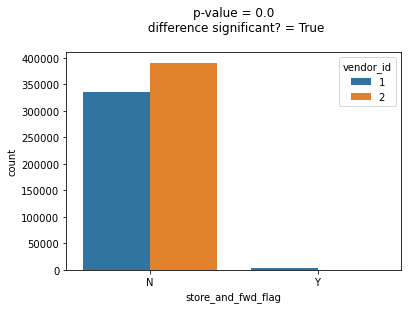

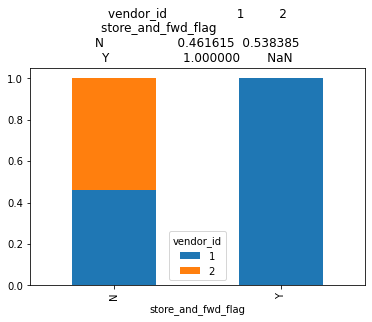

In [99]:
BVA_categorical_plot(data, 'vendor_id', 'store_and_fwd_flag')

# Multivariate Analysis

## Box Plot

We are using a grouped boxplot to comply with the objective of determining the trip_duration using various categorical features. We'll use vendor_id, passenger_count, and store_and_fwd_flag categorical features and derive insights from the boxplots.

In [100]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')

### vendor_id, passenger_count with Trip Duration

We are using one continuous variable that is trip_duration and two categorical variables, vendor_id and passenger_count to derive insights related to trip_dur ation. Note carefully that in order to obtain clear boxplots, we had to take log values of our featured column trip_duration_minutes. This is because our target variable, trip_duration, has heavy outliers that would make it very difficult to analyze the boxplots, but changing its unit to minutes and then taking its log gives us a clearer, detailed picture as shown below.

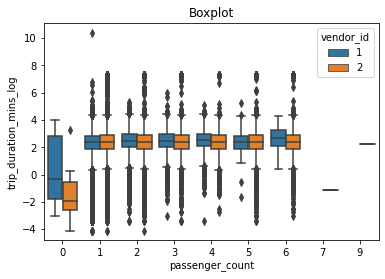

In [101]:
data['trip_duration_mins_log'] = np.log(data['trip_duration_minutes'].astype('float'))
Grouped_Box_Plot(data,'trip_duration_mins_log', 'passenger_count', 'vendor_id')

*    We should recall that passenger_count values of 0,7, and 9 will be dropped in the data preprocessing section coming up soon and, hence, we can ignore those values for analysis now. 
*    In general, we see a similar distribution of trip_duration among the rest of the non-outlier passenger_counts. If we recall from our earlier bivariate continuous-categorical analysis, we concluded that taxis with higher passenger_counts, greater than 2 but less than 7 passengers, are more likely to have higher trip durations. Moreover, we also concluded that Vendor 1 is less likely to deal with higher trip durations than Vendor 2 does and that their differences were significant. The latter hypothesis may not seem so convincing by just looking at the boxplots, but if we look closely at the whiskers and outliers, we see that trip duration values of Vendor 2 have a lot more outliers than those of Vendor 1, which must be reinforcing that relation.

### vendor_id, store_and_fwd_flag with Trip Duration

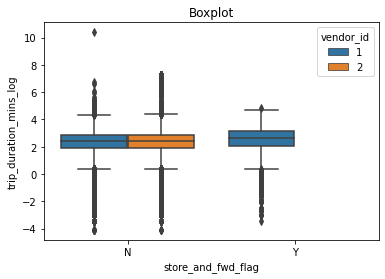

In [102]:
Grouped_Box_Plot(data,'trip_duration_mins_log', 'store_and_fwd_flag', 'vendor_id')

From our earlier categorical-categorical bivariate analysis we saw that Vendor 2 taxis did not have any values of store_and_fwd_flag = 'Y' or, in words, that Vendor 2 taxis did not store and forward trips, because the vehicle did not have a connection to the server. 

### passenger_count, store_and_fwd_flag with Trip Duration

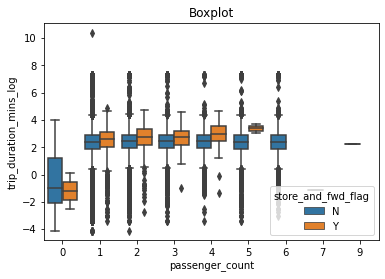

In [103]:
Grouped_Box_Plot(data,'trip_duration_mins_log', 'passenger_count', 'store_and_fwd_flag')

This boxplot supports our earlier bivariate analysis that taxis that store and forward trips, because the vehicle did not have a connection to the server, did experience higher trip duration and p-value results are significantly different too, as p-value < 0.05. Moreover, this relation is present for all non-outlier passenger count values (1-6) as seen in the boxplot and it should be noted that passenger_count value of 6 did not have any trips that did store and forward trips.

In [104]:
data.head()

id vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01                1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57                2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48                2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32                6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  ...  pickup_datetime_hour  pickup_datetime_woy  \
0                  N  ...                    16                    9   
1                  N  ...                    23                   10   
2                  N  ...                    17                    7   
3                  N  ...                     9                    1   
4                  N  ...                     6                    7   

   pickup_datetime_dow  pickup_datetime_doy  dropoff_datetime_moy  \
0                    0                   60                     2   
1                    4                   71                     3   
2                    6                   52                     2   
3                    1                    5                     1   
4                    2                   48                     2   

   dropoff_datetime_hour  dropoff_datetime_woy  dropoff_datetime_dow  \
0                     16                     9                     0   
1                     23                    10                     4   
2                     18                     7                     6   
3                     10                     1                     1   
4                      6                     7                     2   

   dropoff_datetime_doy  trip_duration_mins_log  
0                    60                1.897120  
1                    71                2.908721  
2                    52                3.305054  
3                     5                2.945316  
4                    48                2.648536  

[5 rows x 25 columns]

# Pickup, Dropoff Visualization on NYC Map using Folium

**We shall shuffle our dataset first and then use the first 1000 observations for the convenience of plotting and visualization. Note that the green markers with a label of the play icon denote pick up locations and red markers with a label of the stop icon denote dropoff locations.**

In [105]:
import folium
def show_fmaps(data, path=1):
    """function to generate map and add the pick up and drop coordinates
    1. Path = 1 : Join pickup (blue) and drop(red) using a straight line
    """
    map_1 = folium.Map(location=[40.8, -74.2], zoom_start=9,tiles='Stamen Toner') # manually added centre
    data.sample(frac=1)
    data_reduced = data.iloc[1:2000]
    for i in range(data_reduced.shape[0]):
        pick_long = data.loc[data.index ==i]['pickup_longitude'].values[0]
        pick_lat = data.loc[data.index ==i]['pickup_latitude'].values[0]
        dest_long = data.loc[data.index ==i]['dropoff_longitude'].values[0]
        dest_lat = data.loc[data.index ==i]['dropoff_latitude'].values[0]
        folium.Marker([pick_lat, pick_long], icon=folium.Icon(color='green',icon='play')).add_to(map_1)
        folium.Marker([dest_lat, dest_long], icon=folium.Icon(color='red',icon='stop')).add_to(map_1)
    return map_1

In [106]:
osm = show_fmaps(data, path=1)
osm

# Data Preprocessing for Model Building

### Recall that we did not have any missing values in our dataset, so we can jump straight to outlier removal

### Getting rid of outlier values of passenger_count

In [107]:
#make a new copy of our data
data_cleaned = data.copy()
data_cleaned.head()

id vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01                1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57                2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48                2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32                6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  ...  pickup_datetime_hour  pickup_datetime_woy  \
0                  N  ...                    16                    9   
1                  N  ...                    23                   10   
2                  N  ...                    17                    7   
3                  N  ...                     9                    1   
4                  N  ...                     6                    7   

   pickup_datetime_dow  pickup_datetime_doy  dropoff_datetime_moy  \
0                    0                   60                     2   
1                    4                   71                     3   
2                    6                   52                     2   
3                    1                    5                     1   
4                    2                   48                     2   

   dropoff_datetime_hour  dropoff_datetime_woy  dropoff_datetime_dow  \
0                     16                     9                     0   
1                     23                    10                     4   
2                     18                     7                     6   
3                     10                     1                     1   
4                      6                     7                     2   

   dropoff_datetime_doy  trip_duration_mins_log  
0                    60                1.897120  
1                    71                2.908721  
2                    52                3.305054  
3                     5                2.945316  
4                    48                2.648536  

[5 rows x 25 columns]

In [108]:
#we shall drop those rows that have passenger_count values of 0,7, and 9. We first change datatype to integer for convenience and then convert it back to category after removal
data_cleaned['passenger_count'] = data_cleaned['passenger_count'].astype('int64')
data_cleaned=data_cleaned[data_cleaned.passenger_count<=6]
data_cleaned=data_cleaned[data_cleaned.passenger_count!=0]
data_cleaned['passenger_count'] = data_cleaned['passenger_count'].astype('category')
data_cleaned['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [109]:
data_cleaned.shape

(729287, 25)

### Getting rid of outlier values in all variables belonging to the pickup_dropoff_location group

As discussed previously in the Univariate Analysis for Numerical Variables section, we concluded that we can put the following limits on latitudinal and longitudinal data, including both pickup and dropoff:
*    Latitudinal data range should be between 40.6 to 40.95
*    Longitude data range be between -74.2 to -73.70

In [110]:
#we shall drop those rows that have passenger_count values of 0,7, and 9.
data_cleaned=data_cleaned[data_cleaned.pickup_latitude>=40.6]
data_cleaned=data_cleaned[data_cleaned.pickup_latitude<=40.95]
data_cleaned=data_cleaned[data_cleaned.dropoff_latitude>=40.6]
data_cleaned=data_cleaned[data_cleaned.dropoff_latitude<=40.95]
data_cleaned=data_cleaned[data_cleaned.pickup_longitude>=-74.2]
data_cleaned=data_cleaned[data_cleaned.pickup_longitude<=-73.70]
data_cleaned=data_cleaned[data_cleaned.dropoff_longitude>=-74.2]
data_cleaned=data_cleaned[data_cleaned.dropoff_longitude<=-73.70]
data_cleaned.shape

(728160, 25)

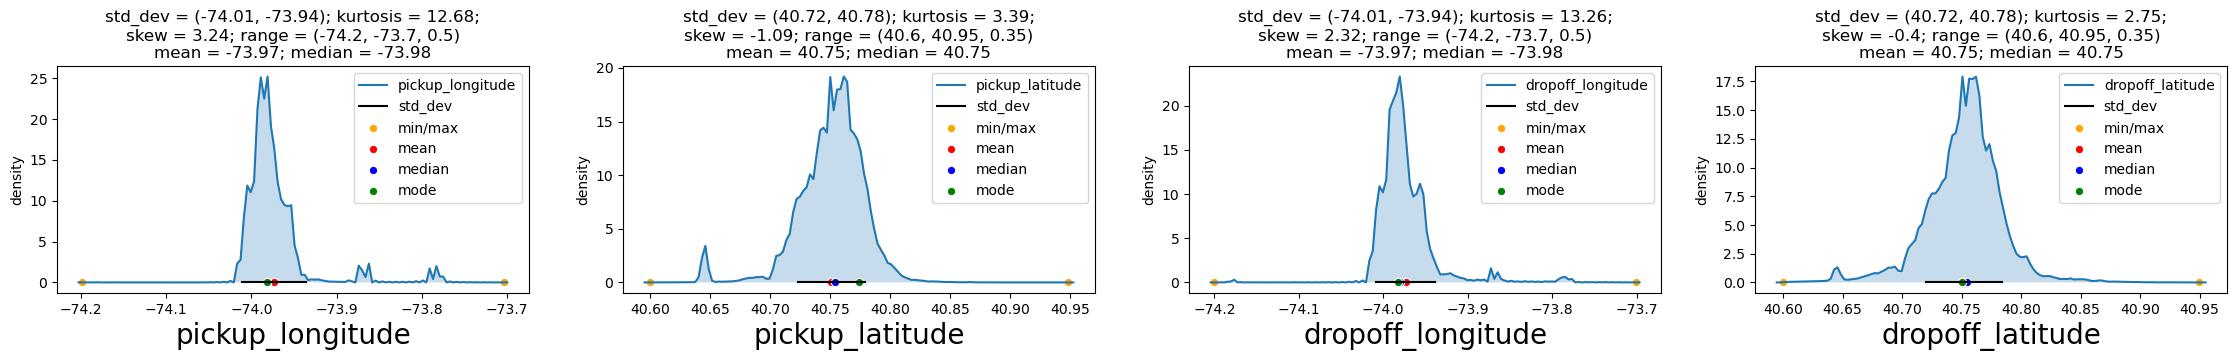

In [111]:
#Looking at the distributions of the above variables
UVA_numeric(data_cleaned,pickup_dropoff_location)

### Outlier treatment for distance, speed, and trip_duration

From our previous Univariate as well as Bivariate analysis, we uncovered a few interesting individual as well correlated findings for these variables. We put forth a few assumptions that we can put the following limits on trip_details features:
*    **trip_duration data range can be reduced from 1 second to 3600 seconds.**
*    **distance data range could be reduced from 1 km to 40 km and speed data range can be reduced from 1 km/hr to 55 km/hr.** 
*    **These restrictions or removal of outliers in this method basically signifies that we shall be concentrating mainly on those trips within the 5 boroughs of NYC, as the data suggests, including some leeway for traffic.**

We see below that there are approx. 2844 observations now, after removing some rows before, with distance = 0 and deleting those observations would mean losing out on information that might be useful. **From the scatterplot in the Bivariate Analysis section, we concluded that it would be better to replace these distance values with their mean value (not the mean from data_cleaned but from data) rather than deleting them.**

In [112]:
data_cleaned.distance[data_cleaned.distance == 0].count()

2844

In [113]:
data_cleaned['distance'].loc[data_cleaned['distance']==0] = data.distance.mean()

In [114]:
data_cleaned['distance'].loc[data_cleaned['distance']==0].count()

0

In [115]:
data_cleaned.shape

(728160, 25)

**Therefore, as can be seen in the code above, we have successfully replaced distance=0 values with a mean value of approx. 3.1 and, simultaneously, values of speed would change too respectively.**  We shall now move ahead to remove outlier values for speed and trip_duration, which would simultaneously change trip_duration_minutes values. As discussed in the previous sections and above, **we shall reduce the trip_duration data range from 1 second to 3600 seconds. We shall also change speed values of 0 km/hr to their mean value in the original dataset and keep only those values < 55 km/hr or the citywide limit.**

In [116]:
#checking how many outlier values will be removed for trip_duration > 3600
data_cleaned.trip_duration[data_cleaned.trip_duration > 3600 ].count()

5937

In [117]:
#removing the outliers and cleaning the dataset
data_cleaned=data_cleaned[data_cleaned.trip_duration<=3600]

In [118]:
#removing trip_duration_mins_log feature as it was used only for data visualization and will not be needed anymore
data_cleaned.drop(["trip_duration_mins_log"], axis = 1, inplace = True)

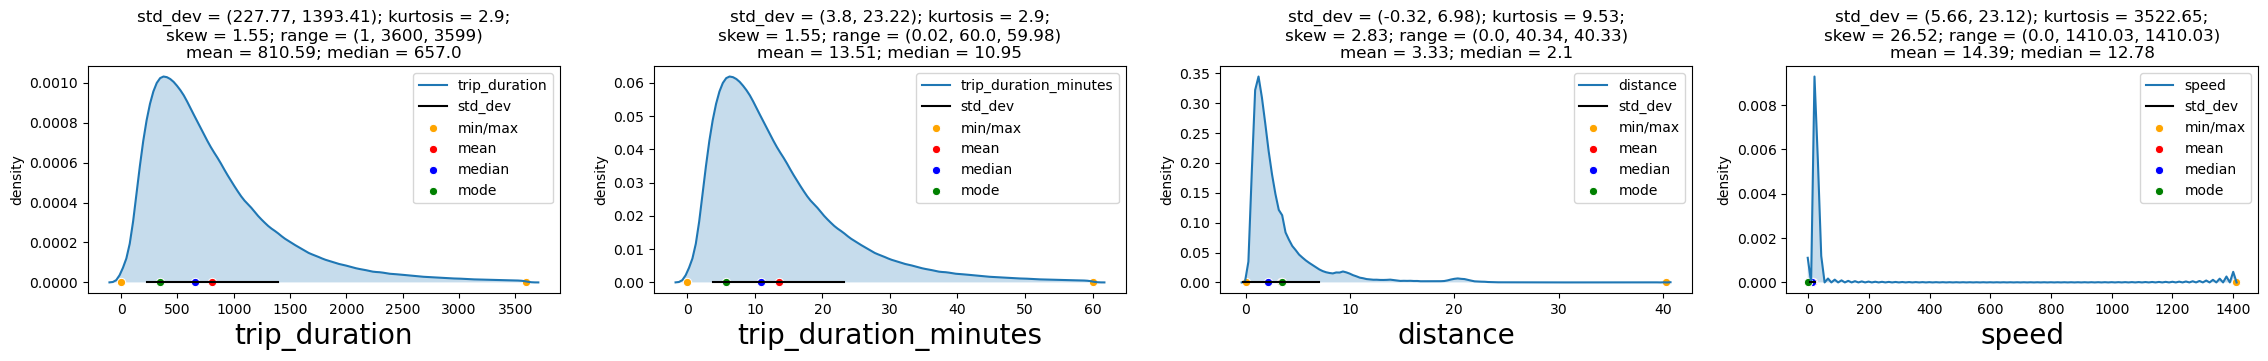

In [119]:
UVA_numeric(data_cleaned,trip_details)

In [120]:
data_cleaned.trip_duration

0          400
1         1100
2         1635
3         1141
4          848
          ... 
729317     296
729318     315
729319     673
729320     447
729321    1224
Name: trip_duration, Length: 722223, dtype: int64

In [121]:
data_cleaned.shape

(722223, 24)

In [122]:
data_cleaned.speed.describe()

count    722223.000000
mean         14.392167
std           8.729333
min           0.000000
25%           9.128261
50%          12.778296
75%          17.815131
max        1410.026691
Name: speed, dtype: float64

In [123]:
#next we shall get rid of outliers in the speed column, i.e speed > 55 and replace speed values of 0 with mean value of 14.39 km/hr
data_cleaned.speed[data_cleaned.speed > 55].count()

544

In [124]:
data_cleaned=data_cleaned[data_cleaned.speed<=55]
data_cleaned['speed'].loc[data_cleaned['speed']==0] = data.speed.mean()

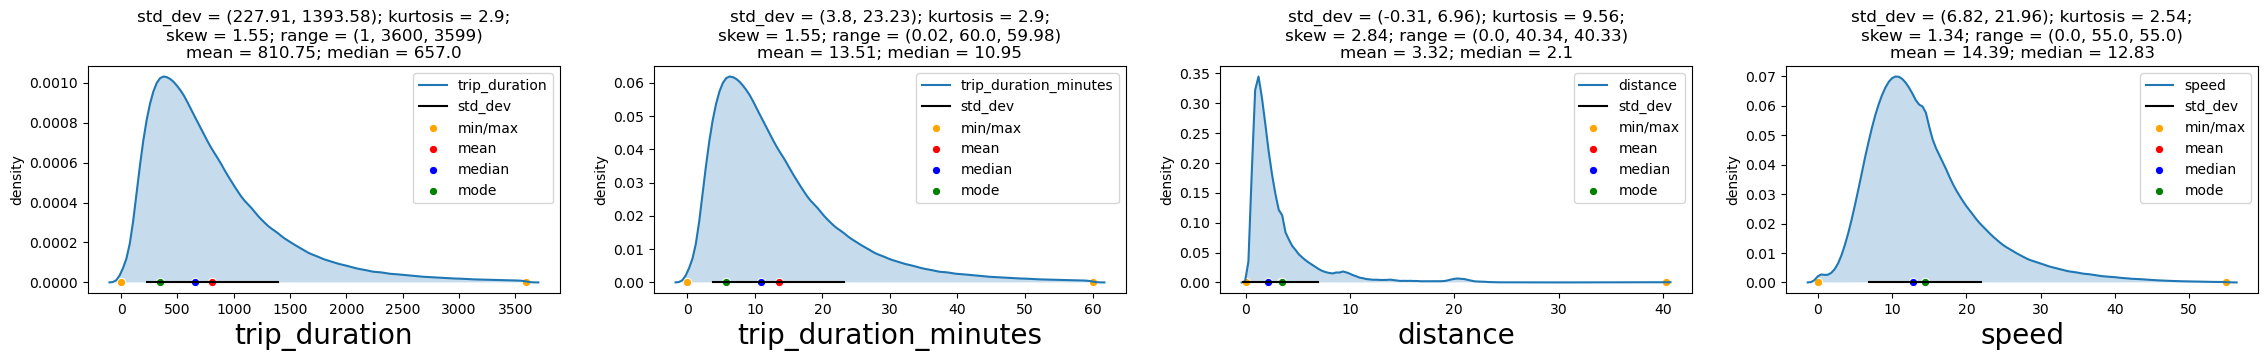

In [125]:
UVA_numeric(data_cleaned,trip_details)

In [126]:
data_cleaned['speed'].loc[data_cleaned['speed']==0].count()

0

In [127]:
(len(data)), (len(data_cleaned))

(729322, 721679)

*   Looking at the above distributions, we can say that we did a decent job on removing heavy outliers and just managed to remove a mere 7,643 values from 729,322 values. If we remember from our previous analysis of latitudes and longitudes, we put a limit to make sure distances faired well between the 5 boroughs of NYC. However, now looking at the above distribution as well as kurtosis and skewness values of distance, we do feel tempted to remove a few more outliers to make our dataset consistent. Hence, we can move ahead and just remove some more outliers by keeping a maximum limit to distance of 30 km. We shall make no more changes after this, as it would result in losing key insights from our model eventually.

In [128]:
data_cleaned=data_cleaned[data_cleaned.distance<=30]

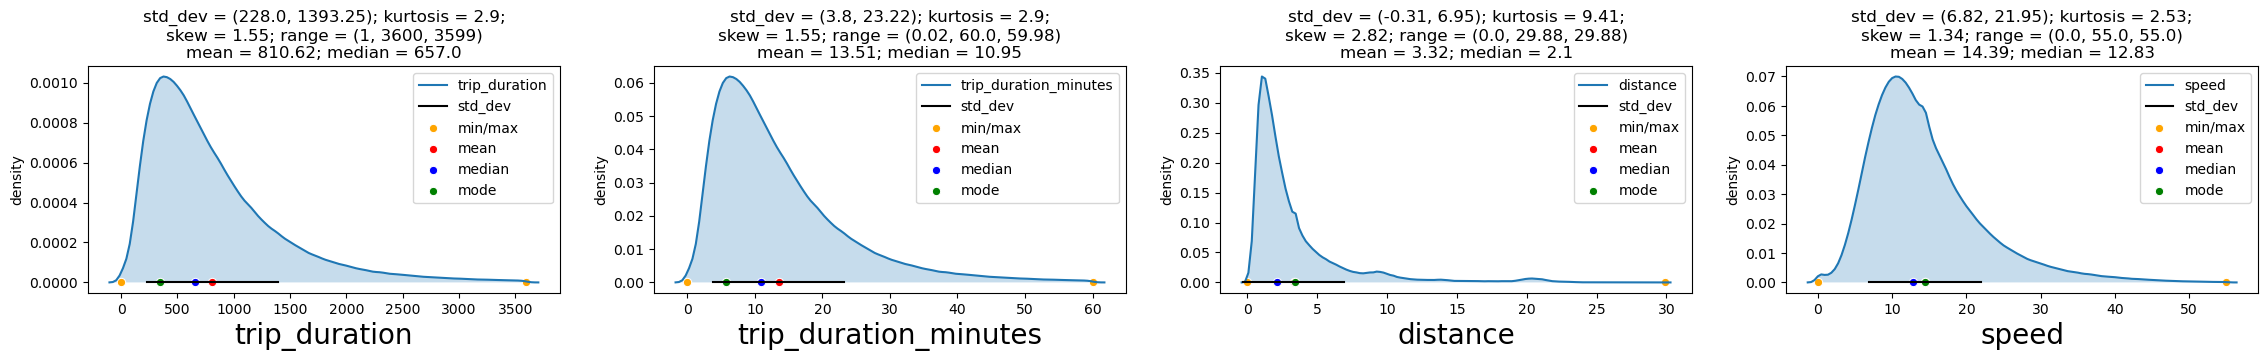

In [129]:
UVA_numeric(data_cleaned,trip_details)

In [130]:
#removing trip_duration_minutes feature too as it was used only for data visualization and will not be needed anymore
data_cleaned.drop(["trip_duration_minutes"], axis = 1, inplace = True)

In [131]:
#removing pickup_datetime and dropoff_datetime, as we have already extracted features from them 
data_cleaned.drop(["pickup_datetime", "dropoff_datetime"], axis = 1, inplace = True)

In [149]:
#removing all dropoff datetime variables, as we have already extracted features pickup datetimes features and using dropoff datetimes variables would simply lead to multicollinearity
data_cleaned.drop(["dropoff_datetime_moy", "dropoff_datetime_hour", "dropoff_datetime_woy", "dropoff_datetime_dow", "dropoff_datetime_doy"], axis = 1, inplace = True)

In [141]:
#removing id variable  
data_cleaned.drop(["id"], axis = 1, inplace = True)

In [150]:
(len(data)), (len(data_cleaned))

(729322, 721637)

In [151]:
data_cleaned.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count     721637.000000    721637.000000      721637.000000     721637.000000   
mean         -73.974280        40.751325         -73.973838         40.752083   
std            0.036190         0.027255           0.033849          0.031266   
min          -74.199020        40.600216         -74.199982         40.600040   
25%          -73.991905        40.737617         -73.991333         40.736256   
50%          -73.981827        40.754219         -73.979797         40.754601   
75%          -73.967682        40.768353         -73.963242         40.769802   
max          -73.703575        40.947769         -73.700935         40.948936   

       trip_duration       distance          speed  pickup_datetime_moy  \
count  721637.000000  721637.000000  721637.000000        721637.000000   
mean      810.624191       3.320664      14.388676             3.514951   
std       582.626757       3.629856       7.563786             1.680191   
min         1.000000       0.000424       0.002047             1.000000   
25%       395.000000       1.238931       9.182988             2.000000   
50%       657.000000       2.095110      12.832771             4.000000   
75%      1059.000000       3.800958      17.798137             5.000000   
max      3600.000000      29.881459      54.999435             6.000000   

       pickup_datetime_hour  pickup_datetime_woy  pickup_datetime_dow  \
count         721637.000000        721637.000000        721637.000000   
mean              13.615089            13.117049             3.051353   
std                6.410425             7.349065             1.955648   
min                0.000000             1.000000             0.000000   
25%                9.000000             7.000000             1.000000   
50%               14.000000            13.000000             3.000000   
75%               19.000000            19.000000             5.000000   
max               23.000000            26.000000             6.000000   

       pickup_datetime_doy  
count        721637.000000  
mean             91.774685  
std              51.546143  
min               1.000000  
25%              48.000000  
50%              92.000000  
75%             136.000000  
max             182.000000

In [152]:
data_cleaned.dtypes

vendor_id               category
passenger_count         category
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
store_and_fwd_flag      category
trip_duration              int64
distance                 float64
speed                    float64
pickup_datetime_moy        int64
pickup_datetime_hour       int64
pickup_datetime_woy        int64
pickup_datetime_dow        int64
pickup_datetime_doy        int64
dtype: object

In [153]:
data_cleaned.shape

(721637, 15)

*   **This brings us to the end of our data preprocessing section and we can now focus on model building with our cleaned data!**

# Model Building

In [137]:
import h2o

In [138]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_241"; Java(TM) SE Runtime Environment (build 1.8.0_241-b07); Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from /Applications/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/tmpyzcysd3u
  JVM stdout: /var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/tmpyzcysd3u/h2o_Tegveer_started_from_python.out
  JVM stderr: /var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/tmpyzcysd3u/h2o_Tegveer_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.0.7
H2O_cluster_version_age:    8 days
H2O_cluster_name:           H2O_from_python_Tegveer_5wwdby
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.778 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.3 final
--------------------------  ------------------------------------------------------------------

In [139]:
from h2o.automl import H2OAutoML

In [154]:
h20_cleaned = h2o.H2OFrame(data_cleaned)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [155]:
h20_cleaned.types

{'vendor_id': 'int',
 'passenger_count': 'int',
 'pickup_longitude': 'real',
 'pickup_latitude': 'real',
 'dropoff_longitude': 'real',
 'dropoff_latitude': 'real',
 'store_and_fwd_flag': 'enum',
 'trip_duration': 'int',
 'distance': 'real',
 'speed': 'real',
 'pickup_datetime_moy': 'int',
 'pickup_datetime_hour': 'int',
 'pickup_datetime_woy': 'int',
 'pickup_datetime_dow': 'int',
 'pickup_datetime_doy': 'int'}

In [160]:
h20_cleaned['vendor_id'] = h20_cleaned['vendor_id'].asfactor()
# verify that the column is now a factor
h20_cleaned["vendor_id"].isfactor()

[True]

In [161]:
h20_cleaned.describe()

Rows:721637
Cols:15




vendor_id passenger_count pickup_longitude pickup_latitude dropoff_longitude dropoff_latitude store_and_fwd_flag trip_duration distance speed pickup_datetime_moy pickup_datetime_hour pickup_datetime_woy pickup_datetime_dow pickup_datetime_doy 
 
 
 type enum int real real real real enum int real real int int int int int 
 mins 1.0 -74.19902038574219 40.60021591186523 -74.19998168945312 40.600040435791016 1.0 0.00042417556664663906 0.0020469598492855235 1.0 0.0 1.0 0.0 1.0 
 mean 1.6609278626234532 -73.97428001983475 40.75132488158506 -73.97383780250922 40.752083432838816 810.624190555639 3.320664029123365 14.388676446036873 3.514951422945331 13.615089026754456 13.117049153521789 3.051352688401507 91.77468450204172 
 maxs 6.0 -73.70357513427734 40.947769165039055 -73.70093536376955 40.948936462402344 3600.0 29.881459049405297 54.999435290566176 6.0 23.0 26.0 6.0 182.0 
 sigma 1.3116845039852307 0.036190239594369886 0.027254976927624373 0.03384933694803247 0.03126634618362957 582.6267570292842 3.629856210638743 7.5637859032551615 1.6801907285646525 6.410425078136075 7.349064556344479 1.955647802112028 51.54614346731938 
 zeros 0 0 0 0 0 0 0 0 0 26522 0 92963 0 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 2 1.0 -73.95391845703125 40.77887344360352 -73.96387481689453 40.77116394042969 N 400.0 1.199074270004627 10.791668430041645 2.0 16.0 9.0 0.0 60.0 
 1 1 2.0 -73.98831176757811 40.73174285888672 -73.9947509765625 40.69493103027344 N 1100.0 4.12911669119162 13.51347280753621 3.0 23.0 10.0 4.0 71.0 
 2 2 2.0 -73.997314453125 40.721458435058594 -73.94802856445312 40.774917602539055 N 1635.0 7.250762904820898 15.964982542724911 2.0 17.0 7.0 6.0 52.0 
 3 2 6.0 -73.961669921875 40.75971984863281 -73.95677947998048 40.780628204345696 N 1141.0 2.361100624233257 7.449572521682494 1.0 9.0 1.0 1.0 5.0 
 4 1 1.0 -74.01712036132812 40.70846939086913 -73.9881820678711 40.740631103515625 N 848.0 4.3285398692099415 18.375876803249753 2.0 6.0 7.0 2.0 48.0 
 5 2 2.0 -73.99361419677734 40.75188446044922 -73.99542236328125 40.72386169433594 N 1455.0 3.1197155882271455 7.718883929634174 2.0 18.0 6.0 6.0 45.0 
 6 1 1.0 -73.96508026123048 40.75891494750977 -73.976806640625 40.76410675048828 N 397.0 1.1439805192723995 10.373626875014205 4.0 20.0 16.0 2.0 111.0 
 7 2 1.0 -73.96389007568358 40.76543426513672 -73.87242889404298 40.77420043945313 N 1101.0 7.763599822289093 25.38506753881992 6.0 16.0 24.0 6.0 171.0 
 8 2 2.0 -73.87288665771484 40.774280548095696 -73.97901916503906 40.76187896728515 N 1886.0 9.04365934582881 17.262552303808974 3.0 19.0 13.0 0.0 88.0 
 9 1 1.0 -73.98782348632812 40.74098205566406 -73.99915313720702 40.68645095825195 N 1429.0 6.138318853367694 15.463924333186633 4.0 22.0 14.0 6.0 101.0

In [162]:
trip_duration_train,trip_duration_test,trip_duration_valid=h20_cleaned.split_frame(ratios=[0.7,0.15])

In [163]:
x = trip_duration_train.columns
y = "trip_duration"
x.remove(y)

In [164]:
aml = H2OAutoML(max_models=10, seed=10, exclude_algos=["StackedEnsemble"], verbosity='info', nfolds=0)

In [165]:
aml.train(x=x, y=y, training_frame=trip_duration_train, validation_frame=trip_duration_valid)

AutoML progress: |
23:57:59.41: Project: AutoML_20200729_235759037
23:57:59.42: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:57:59.42: Setting stopping tolerance adaptively based on the training frame: 0.0014067466733760866
23:57:59.42: Build control seed: 10
23:57:59.43: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
23:57:59.812: training frame: Frame key: automl_training_py_12_sid_930e    cols: 15    rows: 454557  chunks: 24    size: 25560989  checksum: -6077014715852277392
23:57:59.812: validation frame: Frame key: py_14_sid_930e    cols: 15    rows: 108020  chunks: 24    size: 6107845  checksum: -2502050181753154840
23:57:59.832: leaderboard frame: Frame key: automl_leaderboard_py_12_sid_930e    cols: 15    rows: 50765  chunks: 24    size: 2893784  checksum: -1950683332251101408
23:57:59.832: blending frame: NULL
23:57:59.832: response c

In [166]:
lb = aml.leaderboard

In [167]:
lb.head()

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GBM_4_AutoML_20200729_235759 1178.65 34.3314 1178.65 11.7856 nan 
 GBM_5_AutoML_20200729_235759 1247.9 35.3256 1247.9 8.44331 nan 
 GBM_3_AutoML_20200729_235759 1308.32 36.1707 1308.32 13.7666 nan 
 GBM_2_AutoML_20200729_235759 1371.09 37.0282 1371.09 14.68 nan 
 GBM_1_AutoML_20200729_235759 1392.01 37.3096 1392.01 15.3131 nan 
 XGBoost_1_AutoML_20200729_235759 1577.8 39.7215 1577.8 16.5916 nan 
 XGBoost_3_AutoML_20200729_235759 1628.87 40.3592 1628.87 16.8202 nan 
 DRF_1_AutoML_20200729_235759 3956.1 62.8976 3956.1 22.9231 0.183252 
 XGBoost_2_AutoML_20200729_235759 4329.8 65.8012 4329.8 38.4375 nan 
 GLM_1_AutoML_20200729_235759 344369 586.829 344369 440.624 0.796591

In [168]:
trip_duration_pred = aml.leader.predict(trip_duration_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [169]:
trip_duration_pred.head()

predict 
 
 
 1104.49 
 1468.19 
 191.143 
 2316.35 
 562.661 
 175.244 
 1635.31 
 612.257 
 1510.5 
 1163.67

In [170]:
aml.leader.model_performance(trip_duration_test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1199.1740015907933
RMSE: 34.6290918389552
MAE: 11.804907132262493
RMSLE: NaN
Mean Residual Deviance: 1199.1740015907933


In [171]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [172]:
model_ids

['GBM_4_AutoML_20200729_235759',
 'GBM_5_AutoML_20200729_235759',
 'GBM_3_AutoML_20200729_235759',
 'GBM_2_AutoML_20200729_235759',
 'GBM_1_AutoML_20200729_235759',
 'XGBoost_1_AutoML_20200729_235759',
 'XGBoost_3_AutoML_20200729_235759',
 'DRF_1_AutoML_20200729_235759',
 'XGBoost_2_AutoML_20200729_235759',
 'GLM_1_AutoML_20200729_235759']

In [173]:
h2o.get_model([model for model in model_ids if "GBM" in model][0])

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_20200729_235759


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              195.0                     195.0            1249568.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        0.0       10.0    9.897436         1.0      1010.0    506.24615



ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 804.456365486372
RMSE: 28.362940000754012
MAE: 10.065705609950934
RMSLE: NaN
Mean Residual Deviance: 804.456365486372

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 1295.6469972843677
RMSE: 35.99509685060408
MAE: 11.905215108107155
RMSLE: NaN
Mean Residual Deviance: 1295.6469972843677

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2020-07-30 00:39:43   0.008 sec              0.0     582.538949   
1     2020-07-30 00:39:45   1.537 sec              5.0     373.044298   
2     2020-07-30 00:39:47   3.795 sec             10.0     233.991078   
3     2020-07-30 00:39:52   8.309 sec             15.0     157.944773   
4     2020-07-30 00:39:54  10.725 sec             20.0     106.394756   
5     2020-07-30 00:39:56  12.740 sec             25.0      84.156395   
6     2020-07-30 00:39:59  15.097 sec             30.0      66.908392   
7     2020-07-30 00:40:02  18.577 sec             35.0      53.189338   
8     2020-07-30 00:40:05  21.544 sec             40.0      47.586531   
9     2020-07-30 00:40:07  23.621 sec             45.0      41.250246   
10    2020-07-30 00:40:10  26.084 sec             50.0      38.884982   
11    2020-07-30 00:40:13  29.901 sec             55.0      36.818265   
12    2020-07-30 00:40:19  35.285 sec             60.0      35.381634   
13    2020-07-30 00:40:21  37.188 sec             65.0      34.391517   
14    2020-07-30 00:40:23  39.527 sec             70.0      33.714089   
15    2020-07-30 00:40:25  41.191 sec             75.0      33.201926   
16    2020-07-30 00:40:26  42.679 sec             80.0      32.763109   
17    2020-07-30 00:40:28  44.268 sec             85.0      32.396051   
18    2020-07-30 00:40:30  46.811 sec             90.0      32.089582   
19    2020-07-30 00:40:32  48.191 sec             95.0      31.649720   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0     437.799459      339351.626892       582.256836      437.208005   
1     277.926263      139162.047945       373.238919      277.507091   
2     172.627600       54751.824623       234.626896      172.567013   
3     114.298391       24946.551413       159.000699      114.438808   
4      74.710142       11319.844195       107.955983       75.072594   
5      56.855045        7082.298860        86.303801       57.484470   
6      42.966986        4476.732874        69.493881       43.751641   
7      31.252849        2829.105625        56.257028       32.212237   
8      26.206253        2264.477920        51.013797       27.298336   
9      20.200707        1701.582783        44.889632       21.370727   
10     17.755890        1512.041848        42.780252       19.008878   
11     15.813282        1355.584656        40.930293       17.126097   
12     14.463681        1251.860008        39.671640       15.828964   
13     13.485175        1182.776437        38.772209       14.875147   
14     12.878276        1136.639829        38.219012       14.295385   
15     12.455527        1102.367922        37.925336       13.916026   
16     12.107651        1073.421308        37.663082       13.592309   
17     11.788106        1049.504148        37.337172       13.289097   
18     11.574736        1029.741294        37.125093       13.092671   
19     11.342021        1001.704776        36.976974       12.888280   

    validation_deviance  
0         339023.023355  
1         139307.290441  
2          55049.780407  
3          25281.222214  
4          11654.494363  
5           7448.346009  
6           4829.399527  
7           3164.853187  
8           2602.407454  
9           2015.079021  
10          1830.149931  
11          1675.288891  
12          1573.839035  
13          1503.284208  
14          1460.692902  
15          1438.331075  
16          1418.507727  
17          1394.064423  
18          1378.272528  
19          1367.296586


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance    percentage
0               distance         4.685565e+11       1.000000e+00  6.691091e-01
1                  speed         1.423710e+11       3.038502e-01  2.033090e-01
2       pickup_longitude         3.995005e+10       8.526196e-02  5.704955e-02
3      dropoff_longitude         2.090119e+10       4.460761e-02  2.984736e-02
4   pickup_datetime_hour         1.365393e+10       2.914041e-02  1.949811e-02
5       dropoff_latitude         7.003606e+09       1.494720e-02  1.000130e-02
6    pickup_datetime_dow         3.501538e+09       7.473032e-03  5.000274e-03
7        pickup_latitude         3.162854e+09       6.750208e-03  4.516626e-03
8    pickup_datetime_woy         4.776542e+08       1.019416e-03  6.821008e-04
9    pickup_datetime_doy         2.721777e+08       5.808855e-04  3.886758e-04
10   pickup_datetime_moy         1.980810e+08       4.227473e-04  2.828641e-04
11             vendor_id         1.517985e+08       3.239706e-04  2.167717e-04
12       passenger_count         6.852117e+07       1.462389e-04  9.784975e-05
13    store_and_fwd_flag         3.159839e+05       6.743773e-07  4.512320e-07

In [174]:
output=h2o.get_model([model for model in model_ids if "GBM" in model][0])

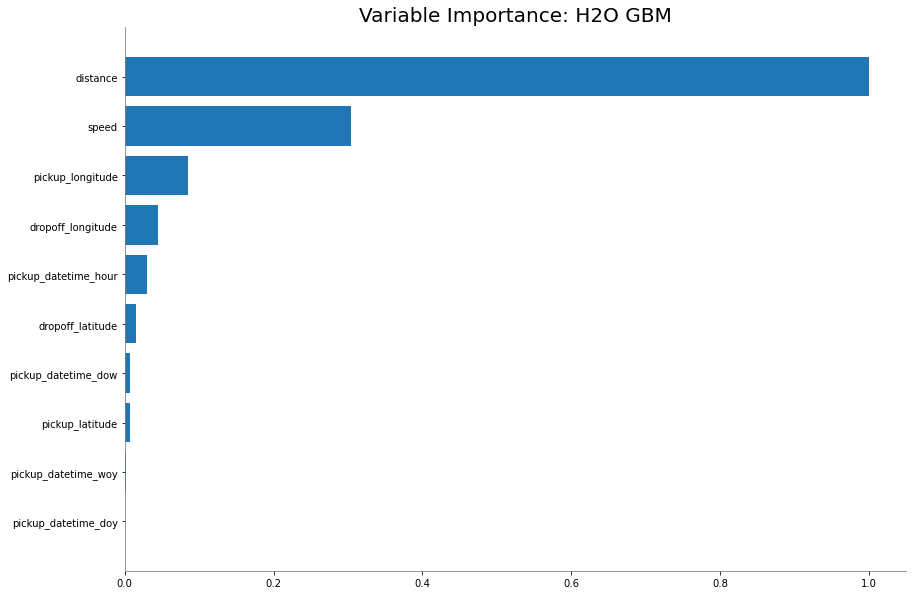

In [176]:
output.varimp_plot()

In [180]:
aml.leader.download_mojo(path="~/experiment/", get_genmodel_jar=True)

'/Users/Tegveer/experiment/GBM_4_AutoML_20200729_235759.zip'

In [181]:
print(x)

['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'distance', 'speed', 'pickup_datetime_moy', 'pickup_datetime_hour', 'pickup_datetime_woy', 'pickup_datetime_dow', 'pickup_datetime_doy']


In [184]:
trip_duration_pred.shape

(108295, 1)